<a href="https://colab.research.google.com/github/abhinav4201/UnSupervised-ML-Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/UnSupervised_ML_Zomato_Restaurant_Clustering_and_Sentiment_Analysis_capstone_project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font size='6px'><font color='#FF3286'>**ML Assignment**  


### <font color='#3792cb'>**Zomato Cuisine Clustering and Sentiment Analysis**


##### Project Type  - Unsupervised Machine Learning
**Contribution**   
- Divya Goyal (DS6A2111)
- Aashita Sharma (DS6A2102)

## **Project Overview**

This project entailed the utilization of advanced data analytics techniques to gain a deeper understanding of the restaurants and customer feedback on the popular online food delivery platform, Zomato.

The data procured included information such as the restaurant's name, location, cuisines, average cost for two, ratings, and user reviews.

Subsequently, we embarked on the task of data cleaning and preprocessing, which involved the elimination of duplicate entries, addressing missing values, and transforming the data into a format amenable to analysis.

The next step in the project was the implementation of clustering on the restaurant data through the use of the **k-means algorithm**. The objective of the clustering was to group similar restaurants together and discern patterns within the data. The features employed for the clustering process included the restaurant's location, cuisines, and average cost for two. The number of clusters was determined by utilizing the **elbow method**.

We then proceeded to conduct sentiment analysis on the user reviews to gain a comprehensive understanding of the overall sentiment towards the restaurants. Certain libraries were utilized to classify the reviews as positive, negative, or neutral. Additionally, we extracted the most recurrent words utilized in the reviews and visualized them through the creation of **word clouds**.

The outcome of the analysis revealed that the restaurants within the city were grouped into five clusters based on their location, cuisines, and average cost for two. The sentiment analysis uncovered that, generally, **customers held a positive sentiment towards the restaurants**.

In conclusion, this project exemplifies the utility of clustering and sentiment analysis in gaining a more profound comprehension of restaurant data on Zomato. The insights procured from the analysis can be of immense benefit to both restaurants and customers in making informed decisions. Furthermore, the project can be extended to other cities or even countries to gain insight into the eating habits and preferences of individuals in different regions.

### **Our Aim**


Our aim for this project is to analyze and understand the restaurant industry in India by utilizing data from the Indian restaurant aggregator and food delivery start-up, Zomato. The project aims to gain insights into the sentiments of customer reviews, cluster Zomato restaurants into different segments, and analyze the data to make useful conclusions in the form of visualizations. The data analyzed includes information on cuisine, costing, and customer reviews. The project aims to assist customers in finding the best restaurant in their locality and aid the company in identifying areas for growth and improvement in the industry. Additionally, the project aims to use the data for sentiment analysis and identifying critics in the industry through the metadata of reviewers.

# <font color='#FF3286'> **1. Know Your Data**

**Import Libraries**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import math
import time
from wordcloud import WordCloud

from scipy.stats import norm
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,PrecisionRecallDisplay,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#importing kmeans
from sklearn.cluster import KMeans

#importing random forest and XgB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Non-negative matrix Factorization
from sklearn.decomposition import NMF


from sklearn.naive_bayes import MultinomialNB

#principal component analysis
from sklearn.decomposition import PCA


#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

#import stemmer
from nltk.stem.snowball import SnowballStemmer

#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

#LDA
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
from sklearn.decomposition import LatentDirichletAllocation

#importing contraction
!pip install contractions
!pip install gensim
import gensim
from gensim import corpora

#importing shap for model explainability
!pip install shap
import shap 

#download small spacy model
# !python -m spacy download en_core_web_sm
# import spacy

# The following lines adjust the granularity of reporting. 
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divyagoyal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/divyagoyal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/divyagoyal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/divyagoyal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/divyagoyal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=30229) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=30229) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=30229) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/shap/plots/colors/_colorconv.py:819: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if np.issubdtype(dtype_in, np.dtype(dtype).type):
/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/shap/plots/colors/_colorconv.py:819: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if np.issubdtype(dtype_in, np.dtype(dtype).type):
/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/shap/plots/colors/_colorconv.py:819: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if np.issubdtype(dtype_in, np.dtype(dtype).type):
/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/shap/plots/colo

<font color='#FF3286'> **Dataset Loading**

In [2]:

hotel_df = pd.read_csv('/Users/divyagoyal/Projects/Zomato-Restaurant-Clustering/Data/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/Users/divyagoyal/Projects/Zomato-Restaurant-Clustering/Data/Zomato Restaurant reviews.csv')

<font color='#FF3286'> **Dataset First View**

In [3]:
# Dataset First Look restaurant
hotel_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [4]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

<font color='#FF3286'> **Dataset Rows & Columns count**

In [5]:
# Dataset Rows(Observation) & Columns count(Feature)
print(f'Total observation and feature for restaurant: {hotel_df.shape}')
print(f'Total observation and feature for review: {review_df.shape}')

Total observation and feature for restaurant: (105, 6)
Total observation and feature for review: (10000, 7)


<font color='#FF3286'> **Dataset Information**

In [6]:
# Dataset Info
print('Restaurant Info')
print('\n')
hotel_df.info()
print('='*120)
print('\n')
print('Review Info')
print('\n')
review_df.info()

Restaurant Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


Review Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)

<font color='#FF3286'> **Duplicate Values**

In [7]:

print('For Restaurant')
print('\n')
print(f"Data is duplicated ? {hotel_df.duplicated().value_counts()},unique values with {len(hotel_df[hotel_df.duplicated()])} duplication")
print('\n')
print('='*120)
print('\n')
print('For Reviews')
print('\n')
print(f"Data is duplicated ? {review_df.duplicated().value_counts()},unique values with {len(review_df[review_df.duplicated()])} duplication")

For Restaurant


Data is duplicated ? False    105
Name: count, dtype: int64,unique values with 0 duplication




For Reviews


Data is duplicated ? False    9964
True       36
Name: count, dtype: int64,unique values with 36 duplication


In [8]:
#getting duplicate values
print(f' Duplicate data count = {review_df[review_df.duplicated()].shape[0]}')
review_df[review_df.duplicated()]

 Duplicate data count = 36


Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

In [9]:
#checking values for Anerican Wild Things
review_df[(review_df['Restaurant'] == 'American Wild Wings')].shape

(100, 7)

In [10]:
#checking values for Arena Eleven
review_df[(review_df['Restaurant'] == 'Arena Eleven')].shape

(100, 7)

<font color='#FF3286'> **Missing Values/Null Values**

In [11]:
# Missing Values/Null Values Count for hotel data
hotel_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [12]:
# Missing Values/Null Values Count for review data
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

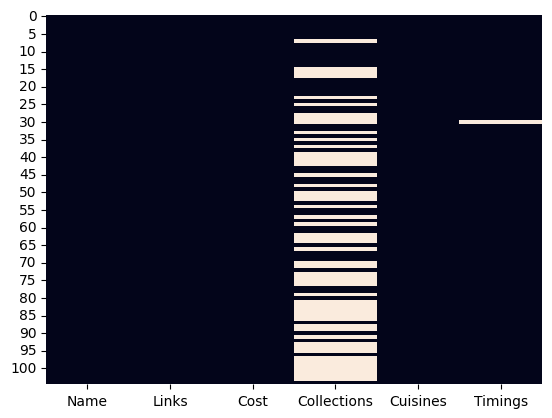

In [13]:
# Visualizing the missing values for restaurant
# Checking Null Value by plotting Heatmap
sns.heatmap(hotel_df.isnull(), cbar=False);

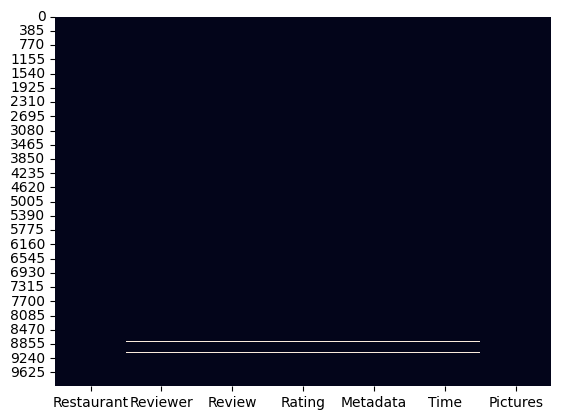

In [14]:
# Visualizing the missing values for reviews
# Checking Null Value by plotting Heatmap
sns.heatmap(review_df.isnull(), cbar=False);

### <font color='#39FF14'> What we got to know about our dataset?

**Restaurant DataSet**
* There are 105 total observation with 6 different features.
* Feature like collection and timing has null values.
* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.
* Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**
* There are total 10000 observation and 7 features.
* Except picture and restaurant feature all others have null values.
* There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
* Rating represent ordinal data, has object data type should be integer.
* Timing represent the time when review was posted but show object data time, it should be converted into date time.


# <font color='#FF3286'> **2. Understanding Variables in our dataset**

In [15]:
# Dataset Columns restaurant
print(f'Features : {hotel_df.columns.to_list()}')

Features : ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']


In [16]:
# Dataset Columns review
print(f'Features : {review_df.columns.to_list()}')

Features : ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [17]:
# Dataset Describe restaurant
hotel_df.describe().T

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

In [18]:
# Dataset Describe review
review_df.describe(include='all').T

count unique              top  freq mean  std  min  25%  50%  \
Restaurant    10000    100  Beyond Flavours   100  NaN  NaN  NaN  NaN  NaN   
Reviewer       9962   7446      Parijat Ray    13  NaN  NaN  NaN  NaN  NaN   
Review         9955   9364             good   237  NaN  NaN  NaN  NaN  NaN   
Rating         9962     10                5  3832  NaN  NaN  NaN  NaN  NaN   
Metadata       9962   2477         1 Review   919  NaN  NaN  NaN  NaN  NaN   
Time           9962   9782  7/29/2018 20:34     3  NaN  NaN  NaN  NaN  NaN   
Pictures   10000.00    NaN              NaN   NaN 0.75 2.57 0.00 0.00 0.00   

            75%   max  
Restaurant  NaN   NaN  
Reviewer    NaN   NaN  
Review      NaN   NaN  
Rating      NaN   NaN  
Metadata    NaN   NaN  
Time        NaN   NaN  
Pictures   0.00 64.00

#### <font color='#FF3286'> **Variables Description** 

**Attributes ▶**

---
**Zomato Restaurant**
* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

**Zomato Restaurant Reviews**
* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review





#### <font color='#FF3286'>  Checking Unique Values for each variable.

In [19]:
# Check Unique Values for each variable for restaurant
for i in hotel_df.columns.tolist():
  print("No. of unique values in ",i,"is",hotel_df[i].nunique(),".")

No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .


In [20]:
# Check Unique Values for each variable for reviews
for i in review_df.columns.tolist():
  print("No. of unique values in ",i,"is",review_df[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


# <font color='#FF3286'> 3. **Data Wrangling**

#### <font color='#FF3286'> Data Wrangling Code

In [21]:
#creating copy of both the data
hotel = hotel_df.copy()
review = review_df.copy()

#### <font color='#FF3286'> Restaurant

In [22]:
#before changing data type for cost, checking values
hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [23]:
# Write your code to make your dataset analysis ready.
# changing the data type of the cost function
hotel['Cost'] = hotel['Cost'].str.replace(",","").astype('int64')

In [24]:
#top 5 costlier restaurant
hotel.sort_values('Cost', ascending = False)[['Name','Cost']][:5]

Name  Cost
92               Collage - Hyatt Hyderabad Gachibowli  2800
56                   Feast - Sheraton Hyderabad Hotel  2500
21  Jonathan's Kitchen - Holiday Inn Express & Suites  1900
18                                  10 Downing Street  1900
91            Cascade - Radisson Hyderabad Hitec City  1800

In [25]:
#top 5 economy restaurant
hotel.sort_values('Cost', ascending = False)[['Name','Cost']][-5:]

Name  Cost
85         Momos Delight   200
29    Hunger Maggi Point   200
101         Sweet Basket   200
89   Mohammedia Shawarma   150
23                  Amul   150

In [26]:
#hotels that share same price
hotel_dict = {}
amount = hotel.Cost.values.tolist() 

#adding hotel name based on the price by converting it into list
for price in amount:
    # Get all the rows that have the current price
    rows = hotel[hotel['Cost'] == price]
    hotel_dict[price] = rows["Name"].tolist()

#converting it into dataframe
same_price_hotel_df=pd.DataFrame.from_dict([hotel_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})

#alternate methode to do the same 
#same_price_hotel_df = hotel.groupby('Cost')['Name'].apply(lambda x: x.tolist()).reset_index()

#getting hotel count
hotel_count = hotel.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

#merging together
same_price_hotel_df = same_price_hotel_df.merge(hotel_count, how = 'inner', 
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max hotels that share same price
same_price_hotel_df.sort_values('Total_Restaurant', ascending = False)[:5]

Cost                                Name of Restaurants  Total_Restaurant
4    500  [eat.fit, KFC, Kritunga Restaurant, Karachi Ba...                13
17   600  [Behrouz Biryani, Karachi Cafe, Hyderabad Chef...                10
20   700  [Marsala Food Company, Green Bawarchi Restaura...                 8
2   1200  [Over The Moon Brew Company, The Glass Onion, ...                 7
8    400  [Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...                 6

In [27]:
#hotels which has max price
same_price_hotel_df.sort_values('Cost', ascending = False)[:5]

Cost                                Name of Restaurants  Total_Restaurant
26  2800             [Collage - Hyatt Hyderabad Gachibowli]                 1
22  2500                 [Feast - Sheraton Hyderabad Hotel]                 1
12  1900  [10 Downing Street, Jonathan's Kitchen - Holid...                 2
25  1800          [Cascade - Radisson Hyderabad Hitec City]                 1
27  1750                  [Zega - Sheraton Hyderabad Hotel]                 1

In [28]:
# spliting the cusines and storing in list 
cuisine_value_list = hotel.Cuisines.str.split(', ')

In [29]:
# storing all the cusines in a dict 
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

In [30]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [31]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

Cuisine  Number of Restaurants
5   North Indian                     61
0        Chinese                     43
1    Continental                     21
6        Biryani                     16
18     Fast Food                     15

In [32]:
# spliting the cusines and storing in list 
Collections_value_list = hotel.Collections.dropna().str.split(', ')

In [33]:
# storing all the cusines in a dict 
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:  
            Collections_dict[col_name]=1 

In [34]:
# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})

In [35]:
#top 5 collection
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

Tags  Number of Restaurants
2                                Great Buffets                     11
0  Food Hygiene Rated Restaurants in Hyderabad                      8
5                       Live Sports Screenings                      7
6                          Hyderabad's Hottest                      7
1                          Corporate Favorites                      6

#### <font color='#FF3286'> Reviews

In [36]:
#in order to change data type for rating checking values
review.Rating.value_counts()

Rating
5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [37]:
#changing data type for each rating since had value as interger surrounded by inverted comma
#since there is one rating as like converting it to 0 since no rating is 0 then to median
review.loc[review['Rating'] == 'Like'] = 0
#changing data type for rating in review data
review['Rating'] = review['Rating'].astype('float')

In [38]:
#since there is one rating as like converting it to median
review.loc[review['Rating'] == 0] = review.Rating.median()

In [39]:
# Handling possible invalid time entries
review['Time'] = pd.to_datetime(review['Time'], errors='coerce', infer_datetime_format=True)

# Check for invalid (NaT) entries
invalid_times = review[review['Time'].isna()]

# Optionally: Handle invalid times (e.g., drop rows or fill with a default value)
if not invalid_times.empty:
    print(f"Invalid time entries found: {len(invalid_times)}")
    # Example: Drop rows with invalid times
    review = review.dropna(subset=['Time'])

# Extract additional features after ensuring valid datetime
review['Review_Year'] = review['Time'].dt.year
review['Review_Month'] = review['Time'].dt.month
review['Review_Hour'] = review['Time'].dt.hour


Invalid time entries found: 39


In [40]:
# Splitting 'Metadata' into two separate columns for reviews and followers
split_metadata = review['Metadata'].str.split(',', expand=True)
review['Reviewer_Total_Review'] = pd.to_numeric(split_metadata[0].str.split(' ').str[0])
review['Reviewer_Followers'] = pd.to_numeric(split_metadata[1].str.split(' ').str[1])

# Converting 'Time' to datetime and extracting additional features
review['Time'] = pd.to_datetime(review['Time'])
review['Review_Year'] = review['Time'].dt.year
review['Review_Month'] = review['Time'].dt.month
review['Review_Hour'] = review['Time'].dt.hour


In [41]:
#Average engagement of restaurants
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

Restaurant  Rating  Total_Review
0                       10 Downing Street    3.80           100
1                                13 Dhaba    3.48           100
2          3B's - Buddies, Bar & Barbecue    4.76           100
3               AB's - Absolute Barbecues    4.88           100
4                       Absolute Sizzlers    3.62           100
..                                    ...     ...           ...
95             Urban Asia - Kitchen & Bar    3.65           100
96  Yum Yum Tree - The Arabian Food Court    3.56           100
97        Zega - Sheraton Hyderabad Hotel    4.45           100
98               Zing's Northeast Kitchen    3.65           100
99                                eat.fit    3.20           100

[100 rows x 3 columns]

In [42]:
#usless data
review[review['Restaurant'] == 3.0]

Empty DataFrame
Columns: [Restaurant, Reviewer, Review, Rating, Metadata, Time, Pictures, Review_Year, Review_Month, Review_Hour, Reviewer_Total_Review, Reviewer_Followers]
Index: []

In [43]:
#checking hotel count as total hotel in restaurant data was 105
review.Restaurant.nunique()

100

In [44]:
#finding hotel without review
hotel_without_review = [name for name in hotel.Name.unique().tolist() 
       if name not in review.Restaurant.unique().tolist()]
hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [45]:
#top 5 most engaging or rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = False)[:5]

Restaurant  Rating  Total_Review
3        AB's - Absolute Barbecues    4.88           100
11                          B-Dubs    4.81           100
2   3B's - Buddies, Bar & Barbecue    4.76           100
67                        Paradise    4.70           100
35                        Flechazo    4.66           100

In [46]:
#top 5 lowest rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = True)[:5]

Restaurant  Rating  Total_Review
41  Hotel Zara Hi-Fi    2.40           100
10    Asian Meal Box    2.58           100
66     Pakwaan Grand    2.71           100
57     Mathura Vilas    2.82           100
14   Behrouz Biryani    2.83           100

#### Finding the most followed critic

In [47]:
#Finding the most followed critic
most_followed_reviewer = review.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]

Reviewer  Reviewer_Total_Review  Reviewer_Followers  \
5463    Satwinder Singh                    186            13410.00   
1701         Eat_vth_me                     60            13320.00   
5235       Samar Sardar                      8            11329.00   
1787  Foodies Hyderabad                     31             9494.00   
6229           Srinivas                     34             7628.00   

      Average_Rating_Given  
5463                  3.67  
1701                  5.00  
5235                  3.50  
1787                  4.50  
6229                  3.71

#### finding which year show maximum

In [48]:
#finding which year show maximum engagement
hotel_year = review.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count']= hotel_year['Restaurant'].apply(lambda x: len(x))
hotel_year

Review_Year                                         Restaurant  Count
0         2016  [Labonel, Labonel, Labonel, Labonel, Labonel, ...     43
1         2017  [KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...    213
2         2018  [Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...   4903
3         2019  [Beyond Flavours, Beyond Flavours, Beyond Flav...   4802

In [49]:
#merging both data frame
hotel = hotel.rename(columns = {'Name':'Restaurant'})
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9961, 17)

In [50]:
#Price point of restaurants
price_point = merged.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})


In [51]:
#price point for high rated restaurants
price_point.sort_values('Rating',ascending = False)[:5]

Restaurant  Rating  Price_Point
3        AB's - Absolute Barbecues    4.88      1500.00
11                          B-Dubs    4.81      1600.00
2   3B's - Buddies, Bar & Barbecue    4.76      1100.00
67                        Paradise    4.70       800.00
35                        Flechazo    4.66      1300.00

In [52]:
#price point for lowest rated restaurants
price_point.sort_values('Rating',ascending = True)[:5]

Restaurant  Rating  Price_Point
41  Hotel Zara Hi-Fi    2.40       400.00
10    Asian Meal Box    2.58       200.00
66     Pakwaan Grand    2.71       400.00
57     Mathura Vilas    2.82       500.00
14   Behrouz Biryani    2.83       600.00

In [53]:
#rating count by reviewer
rating_count_df = pd.DataFrame(review.groupby('Reviewer').size(), columns=[
                                                                "Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]

Rating_Count
Reviewer                  
Ankita                  13
Parijat Ray             13
Kiran                   12
Jay Mehta               11
Vedant Killa            11

#### <font color='#FF3286'> Insights collected from the manipulations made.

Firstly, we started with changing data types for cost and rating. In rating there was only one rating which was string or has value of like so I change it into median of the rating. This was done to make data consistent.

**Restaurant data** : In this dataset we first figured out 5 costlier restaurant in which Collage - Hyatt Hyderabad Gachibowli	has maximum price of 2800 and then found the lowest which is Amul with price of 150. Then we found how many hotel share same price i.e., 13 hotel share 500 price. North indian cuisine with great buffet tags is mostly used in hotels.

**Review data** : In this dataset we found famous or restaurant that show maximum engagement. Followed by that we found most followed critic which was Satwinder Singh who posted total of 186 reviews and had followers of	13410 who gives and average of 3.67 rating for each order he makes. Lastly we also found in year 2018 4903 hotels got reviews. 

Then we merged the two dataset together to figure out the price point for the restaurant, top rated restaurant AB's - Absolute Barbecues has a price point of 1500 and the low rated Hotel Zara Hi-Fi has price point of 400.

In order to exactly understand why even with price point of 1500 these hotel has maximum number of rating and sentiment of those rating need to extract words from the text and do  futher analysis of the review and then followed by forming clusters so that one can get recommendation about top quality restaurants.

# <font color='#FF3286'> **4. Hypothesis Testing**

### <font color='#3792cb'> Hypothetical Statement - 1 

---

The cost of a restaurant is positively correlated with the rating it receives.

**1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

* Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)
* Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression Analysis

**2. Perform an appropriate statistical test.**

In [54]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


I used linear regression to check the relationship between restaurant cost and rating. This method fits a model with rating as the dependent variable and cost as the independent variable. The p-value of the cost coefficient shows if the relationship is statistically significant.

### <font color='#3792cb'> Hypothetical Statement - 2

---
Restaurants that are reviewed by reviewers with more followers will have a higher rating.

**1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

* Null hypothesis: The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0) 
* Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression test

**2. Perform an appropriate statistical test.**

In [55]:
# Perform Statistical Test to obtain P-Value
import statsmodels
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data = merged).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


For the second hypothesis, I used simple linear regression to test the relationship between Reviewer_Followers (independent variable) and Rating (dependent variable). This method assumes a linear relationship and helps estimate the strength and direction of the relationship. The p-value of the coefficient tests the null hypothesis that no relationship exists between the variables.

### <font color='#3792cb'> Hypothetical Statement - 3 

---

Restaurants that offer a wider variety of cuisines will have a higher rating.

**1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

* Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)
* Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
* Test : Chi-Squared Test

**2. Perform an appropriate statistical test.**

In [56]:
pd.crosstab(merged['Cuisines'], merged['Rating'])[:1]

Rating    1.00  1.50  2.00  2.50  3.00  3.50  4.00  4.50  5.00
Cuisines                                                      
American     1     0     1     0     2     0     8     0    88

In [57]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


For the third hypothesis, I used the chi-squared test for independence to examine the relationship between the variety of cuisines offered by a restaurant and its rating. This test is ideal for comparing two categorical variables. I created a contingency table with the types of cuisines as rows and restaurant ratings as columns.

## <font color='#FF3286'> **5. Feature Engineering & Data Pre-processing**

#### <font color='#3792cb'> 1. Handling Missing Values

##### Treating Duplicates

* Since all the duplicated data has NaN values, hence dropping the entire values as it will not help and will create unnecessary noise.

In [58]:
#deleting duplicate value from review dataset
review = review.drop_duplicates()

In [59]:
#final check after dropping duplicates
print(f"Anymore duplicate left ? {review.duplicated().value_counts()}, unique values with {len(review[review.duplicated()])} duplication")

Anymore duplicate left ? False    9961
Name: count, dtype: int64, unique values with 0 duplication


##### Treating Missing Values

<font color='#FF3286'> Restaurant Dataset

---



In [60]:
# Handling Missing Values & Missing Value Imputation
hotel.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [61]:
#checking the null value in timing
hotel[hotel['Timings'].isnull()]

Restaurant                                              Links  Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...   900   

   Collections                            Cuisines Timings  
30         NaN  Andhra, South Indian, North Indian     NaN

In [62]:
#filling null value in timings column
hotel.Timings.fillna(hotel.Timings.mode()[0], inplace = True)

In [63]:
#checking null values in Collections
missing_percentage = ((hotel['Collections'].isnull().sum())/(len(hotel['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [64]:
#dropping collection column since has more than 50% of null values
hotel.drop('Collections', axis = 1, inplace = True)

In [65]:
#final checking of missing value
hotel.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

<font color='#FF3286'> Review Dataset

---



In [66]:
#review missing value
review.isnull().sum()

Restaurant                  0
Reviewer                    0
Review                      7
Rating                      0
Metadata                    0
Time                        0
Pictures                    0
Review_Year                 0
Review_Month                0
Review_Hour                 0
Reviewer_Total_Review       0
Reviewer_Followers       1578
dtype: int64

In [67]:
#checking null reviewer
review[review['Reviewer'].isnull()]

Empty DataFrame
Columns: [Restaurant, Reviewer, Review, Rating, Metadata, Time, Pictures, Review_Year, Review_Month, Review_Hour, Reviewer_Total_Review, Reviewer_Followers]
Index: []

In [68]:
#checking null Reviewer_Total_Review
review[review['Reviewer_Total_Review'].isnull()]

Empty DataFrame
Columns: [Restaurant, Reviewer, Review, Rating, Metadata, Time, Pictures, Review_Year, Review_Month, Review_Hour, Reviewer_Total_Review, Reviewer_Followers]
Index: []

In [69]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
review = review.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [70]:
#again checking the remaining values
null_counts = [(x, a) for x, a in review.isnull().sum().items() if a > 0]

# Print the columns with null values
null_counts

[('Review', 7), ('Reviewer_Followers', 1578)]

In [71]:
#filling null values in review and reviewer follower column
review = review.fillna({"Review": "No Review", "Reviewer_Followers": 0})

In [72]:
# final checking null values
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Review_Year              0
Review_Month             0
Review_Hour              0
Reviewer_Total_Review    0
Reviewer_Followers       0
dtype: int64

In [73]:
#merging both dataset
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9961, 16)

I treated missing values by first removing duplicate rows where all values were NaN, except for the restaurant name. For the hotel dataset, I replaced the single null value in the timing feature with the mode, as it was robust to outliers. I removed the collection feature, as it had over 50% null values, which could affect analysis. In the reviewer dataset, I removed columns with all null values (Reviewer and Reviewer_Total_Review). For the remaining missing values, I replaced null reviews with 'no review' and set Reviewer_Followers to 0. Finally, I merged the cleaned hotel and review datasets.


#### <font color='#3792cb'> 2. Handling Outliers

##### Detecting Anamoly

In [74]:
#Anamoly detection 
from sklearn.ensemble import IsolationForest
#checking for normal distribution 
print("Skewness - Cost: %f" % merged['Cost'].skew())
print("Kurtosis - Cost: %f" % merged['Cost'].kurt())
print("Skewness - Reviewer_Followers: %f" % merged['Reviewer_Followers'].skew())
print("Kurtosis - Reviewer_Followers: %f" % merged['Reviewer_Followers'].kurt())

Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590
Skewness - Reviewer_Followers: 10.092703


Kurtosis - Reviewer_Followers: 151.312960


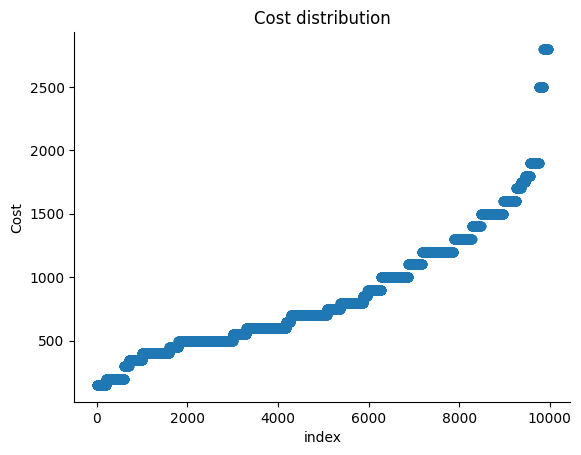

In [75]:
#plotting graph for cost
plt.scatter(range(merged.shape[0]), np.sort(merged['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()


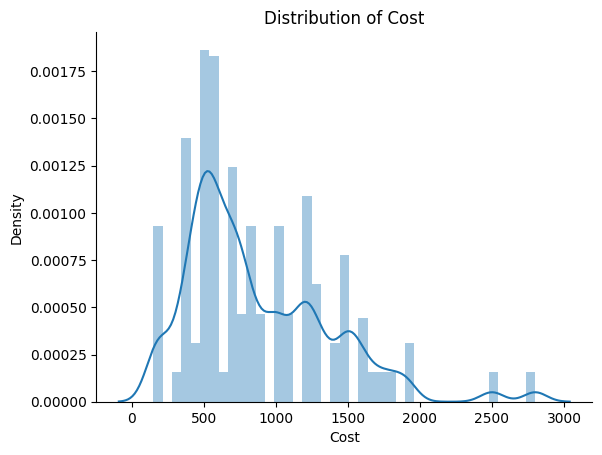

In [76]:
#distribution of cost
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()

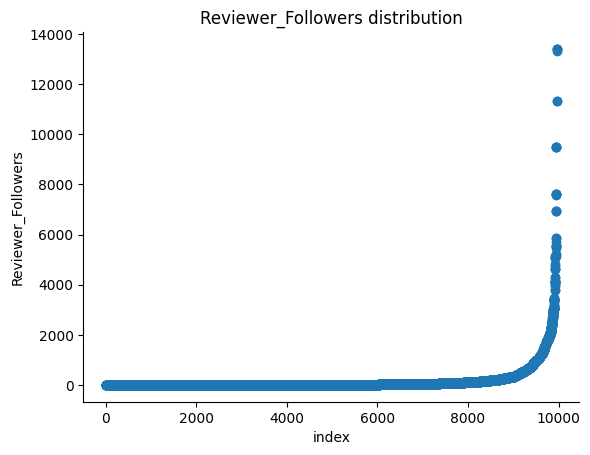

In [77]:
#plot for reviewer follower
plt.scatter(range(merged.shape[0]), np.sort(merged['Reviewer_Followers'].values))
plt.xlabel('index')
plt.ylabel('Reviewer_Followers')
plt.title("Reviewer_Followers distribution")
sns.despine()

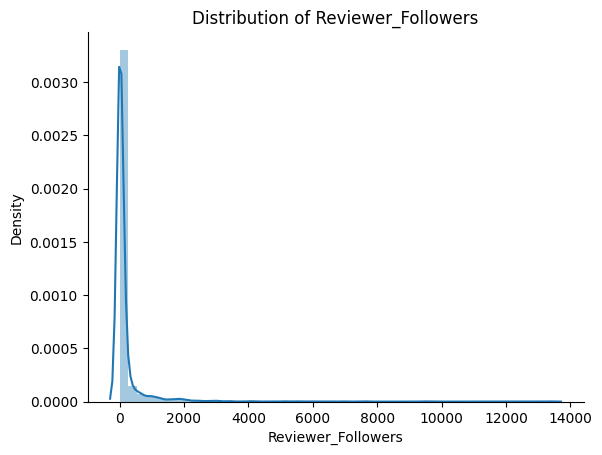

In [78]:
#distribution of Reviewer_Followers
sns.distplot(merged['Reviewer_Followers'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()

In [79]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Cost'].values.reshape(-1, 1))
merged['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged['Cost'].values.reshape(-1, 1))
merged['outlier_univariate_Cost'] = isolation_forest.predict(merged['Cost'].values.reshape(-1, 1))

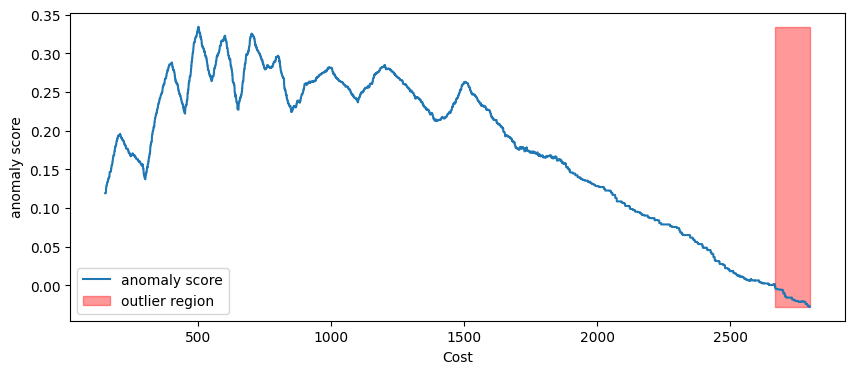

In [80]:
#chart to visualize outliers
xx = np.linspace(merged['Cost'].min(), merged['Cost'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [81]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['outlier_univariate_follower'] = isolation_forest.predict(
    merged['Reviewer_Followers'].values.reshape(-1, 1))


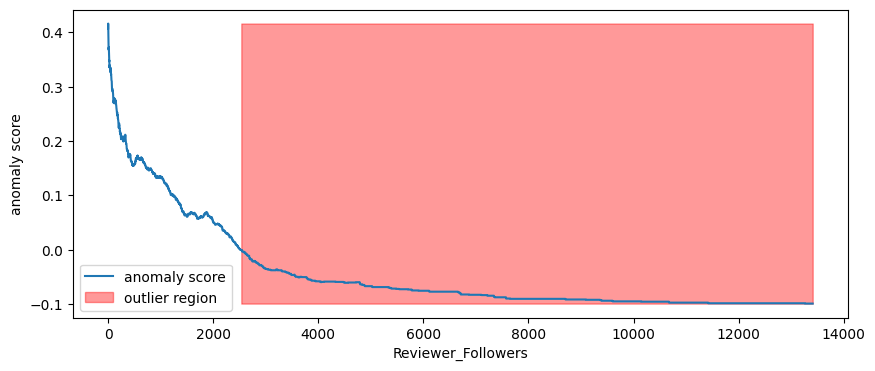

In [82]:
#chat to visualize outliers in reviwer follower column
xx = np.linspace(merged['Reviewer_Followers'].min(), merged['Reviewer_Followers'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();

#### Treating Outlier

In [83]:
# Separate symmetric and skew-symmetric features, excluding non-numeric types
symmetric_feature = []
non_symmetric_feature = []

for i in merged.describe().columns:
    # Check if the column is numeric (excluding datetime or timedelta types)
    if pd.api.types.is_numeric_dtype(merged[i]):
        if abs(merged[i].mean() - merged[i].median()) < 0.2:
            symmetric_feature.append(i)
        else:
            non_symmetric_feature.append(i)

# Print the features
print("Symmetric Distributed Features: ", symmetric_feature)
print("Skew Symmetric Distributed Features: ", non_symmetric_feature)


Symmetric Distributed Features:  ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower']
Skew Symmetric Distributed Features:  ['Cost', 'Rating', 'Pictures', 'Review_Year', 'Review_Month', 'Review_Hour', 'Reviewer_Total_Review', 'Reviewer_Followers']


In [84]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [85]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
hotel.loc[hotel['Cost']<= outlier_treatment_skew(df=hotel,
  feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[1]

#upper limit capping
hotel.loc[hotel['Cost']>= outlier_treatment_skew(df=hotel,
  feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[0]

In [86]:
# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
#lower limit capping
review.loc[review['Reviewer_Followers']<= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[1], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[1]

#upper limit capping
review.loc[review['Reviewer_Followers']>= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[0], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[0]

In [87]:
#dropping the columns created while outliers treatment
merged.drop(columns =['anomaly_score_univariate_Cost','outlier_univariate_Cost',
  'anomaly_score_univariate_follower','outlier_univariate_follower'], inplace = True)

#### <font color='#3792cb'> 3. Categorical Encoding

In [88]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = hotel[['Restaurant','Cuisines']]
#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
# cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].eq(1)[:5].T
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly

# cluster_dummy.columns = cluster_dummy.columns.str.replace(" ","")
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
# cluster_dummy = cluster_dummy.groupby(cluster_dummy.columns, axis=1).sum()

#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [89]:
#total cuisine count 
hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x : len(x.split(',')))

In [90]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
hotel = hotel.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
hotel.head(1)

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   

                                         Timings  Total_Cuisine_Count  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                    6   

   Average_Rating  
0            4.28

In [91]:
#adding cost column to the new dataset 
cluster_dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')

In [92]:
cluster_dummy.shape

(100, 48)



---

Alternate Method for creating dummies

In [93]:
#creating data frame for categorial encoding
cluster_df = hotel[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]

In [94]:
#creating new dataframe for clustering 
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [95]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns 
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

In [96]:
#result from encoding
cluster_df.head(2).T

0  \
Restaurant                                             Beyond Flavours   
Cuisines             Chinese, Continental, Kebab, European, South I...   
Cost                                                            800.00   
Average_Rating                                                    4.28   
Total_Cuisine_Count                                               6.00   
Chinese                                                              1   
Continental                                                          1   
Kebab                                                                1   
European                                                             1   
South Indian                                                         1   
North Indian                                                         1   
Biryani                                                              0   
Asian                                                                0   
Mediterranean                                                        0   
Desserts                                                             0   
Seafood                                                              0   
Beverages                                                            0   
Goan                                                                 0   
Healthy Food                                                         0   
Lebanese                                                             0   
American                                                             0   
Ice Cream                                                            0   
Street Food                                                          0   
Fast Food                                                            0   
BBQ                                                                  0   
Italian                                                              0   
Finger Food                                                          0   
Burger                                                               0   
Japanese                                                             0   
Salad                                                                0   
Sushi                                                                0   
Mexican                                                              0   
Mughlai                                                              0   
Andhra                                                               0   
Bakery                                                               0   
Juices                                                               0   
Arabian                                                              0   
Hyderabadi                                                           0   
Cafe                                                                 0   
Spanish                                                              0   
Wraps                                                                0   
Thai                                                                 0   
Indonesian                                                           0   
Modern Indian                                                        0   
Momos                                                                0   
Pizza                                                                0   
North Eastern                                                        0   
Mithai                                                               0   
Malaysian                                                            0   

                                                  1  
Restaurant                                 Paradise  
Cuisines             Biryani, North Indian, Chinese  
Cost                                         800.00  
Average_Rating                                 4.70  
Total_Cuisine_Count                            3.00  
Chinese                                     

#### <font color='#3792cb'> 4. Textual Data Preprocessing - Review
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

##### 4.1. Expand Contraction

In [97]:
#creating new df for text processing of sentiment analysis
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
sentiment_df.sample(2)

Reviewer                  Restaurant  Rating  \
4447   Yash Barmecha  La La Land - Bar & Kitchen    4.00   
7487  Siddhesh Patil                      Faasos    1.00   

                                                 Review  
4447  It is a good place to go. The ambience can be ...  
7487  Ordered pizza wrap with offer BOGO. Seemed lik...

In [98]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index
sentiment_df.sample(2)

index         Reviewer                               Restaurant  Rating  \
321     321        Avin Seth           Shah Ghouse Hotel & Restaurant    4.00   
9127   9127  Mayank Upadhyay  Cascade - Radisson Hyderabad Hitec City    4.00   

                                                 Review  
321   The place to have one of the best Biryani’s in...  
9127  Great place to have a buffet. Went with team f...

In [99]:
# Expand Contraction
import contractions
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(str(x)))

print(sentiment_df['Review'].head())


0    The ambience was good, food was quite good . h...
1    Ambience is too good for a pleasant evening. S...
2    A must try.. great food great ambience. Thnx f...
3    Soumen das and Arun was a great guy. Only beca...
4    Food is good.we ordered Kodi drumsticks and ba...
Name: Review, dtype: object


##### 4.2. Lower Casing

In [100]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

In [101]:
sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours    5.00   
1      1  Anusha Tirumalaneedi  Beyond Flavours    5.00   
2      2       Ashok Shekhawat  Beyond Flavours    5.00   
3      3        Swapnil Sarkar  Beyond Flavours    5.00   
4      4                Dileep  Beyond Flavours    5.00   

                                              Review  
0  the ambience was good, food was quite good . h...  
1  ambience is too good for a pleasant evening. s...  
2  a must try.. great food great ambience. thnx f...  
3  soumen das and arun was a great guy. only beca...  
4  food is good.we ordered kodi drumsticks and ba...

##### 4.3. Removing Punctuations

In [102]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [103]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

index           Reviewer                  Restaurant  Rating  \
4380   4380  Prachita Jayaswal  The Foodie Monster Kitchen    4.00   
125     125           Si Reddy                    Paradise    5.00   
3963   3963       Sujeeth Mike               Deli 9 Bistro    5.00   
9537   9537             Preeti                  Desi Bytes    1.00   
7453   7453   Siddhanth Sharma                      Faasos    1.00   

                                                 Review  
4380  the waffles are really good it is served in co...  
125   the parans is very good and\nege biryani is ve...  
3963  rice bowls and dessert is a must try the choco...  
9537                          received incomplete order  
7453  ordered jumbo paneer tikka rice fest first of ...

##### 4.4. Removing URLs & Removing words and digits contain digits.

In [104]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [105]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
hotel['Location'] = hotel['Links'].apply(get_location)
hotel.sample(2)

Restaurant                                              Links  Cost  \
63   Dine O China  https://www.zomato.com/hyderabad/dine-o-china-...   850   
85  Momos Delight  https://www.zomato.com/hyderabad/momos-delight...   200   

                 Cuisines                    Timings  Total_Cuisine_Count  \
63  Chinese, Asian, Momos  11:30AM to 11PM (Mon-Sun)                    3   
85                  Momos       6pm to 2am (Mon-Sun)                    1   

    Average_Rating   Location  
63            3.37  hyderabad  
85            3.73  hyderabad

##### 4.5. Removing Stopwords & Removing White spaces

In [106]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [107]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [108]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [109]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [110]:
#random sample 
sentiment_df.sample(2)

index      Reviewer              Restaurant  Rating  \
3335   3335  Swarna Gattu              Club Rogue    1.00   
2636   2636  Sushant Negi  Mustang Terrace Lounge    4.00   

                                                 Review  
3335  bad reception unprofessional staffdo visit pla...  
2636  nice place gachibowli hang friends couple also...

##### 4.6. Tokenization

In [111]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [112]:
sentiment_df.sample(2)

index            Reviewer                  Restaurant  Rating  \
504     504         Mula Renuka       The Fisherman's Wharf    4.00   
7001   7001  Ravi Shankar Gupta  Urban Asia - Kitchen & Bar    5.00   

                                                 Review  
504   [place, huge, rustic, gives, real, goa, vibe, ...  
7001  [evening, dinner, restaurant, food, delicious,...

##### 4.7. Text Normalization

In [113]:
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)


In [114]:
sentiment_df.sample(2)

index            Reviewer  Restaurant  Rating  \
2520   2520     Aditya SAlunkhe  Tiki Shack    3.00   
7498   7498  Sourav Chakraborty      Faasos    5.00   

                                                 Review  
2520  [overrated, know, stag, entry, allowed, crowd,...  
7498                                 [everything, nice]

##### 4.8. Text Vectorization

**Tfidf**

---



In [115]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)



---

**Bag of Words**

In [116]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

#print token dict 
#tokens_dict.token2id

In [117]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

doc_index           doc_id     token  bow
0          0  Beyond Flavours      also    1
1          0  Beyond Flavours  ambience    1
2          0  Beyond Flavours    brunch    1
3          0  Beyond Flavours     chill    1
4          0  Beyond Flavours      cost    1

#### <font color='#3792cb'> 5. Feature Manipulation & Selection

##### 5.1. Feature Manipulation

##### <font color='#3792cb'> Restaurant
---

In [118]:
# Manipulate Features to minimize feature correlation and create new features
hotel.shape

(100, 8)

In [119]:
#columns for dataset
hotel.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating', 'Location'],
      dtype='object')

* Dropping column like link as from link location was extracted, dropping location as it does not have variability only had hyderabad as 99% values. Then dropping Cuisines column as cuisine from the feature are extracted as new feature.

In [120]:
#dropping columns
hotel = hotel.drop(columns = ['Links','Location'], axis = 1)

In [121]:
hotel.shape

(100, 6)

In [122]:
#creating new dataframe which will be used for clustering i.e dropping the unimportant column
#this dataset was used earlier while categorial encoding hence using it for clustering
cluster_df.shape

(100, 49)

In [123]:
#dropping cuisine and restaurant from cluster_df
cluster_df = cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1)

In [124]:
cluster_df.sample(1)

Cost  Average_Rating  Total_Cuisine_Count Chinese Continental Kebab  \
39 700.00            3.82                 3.00       0           1     0   

   European South Indian North Indian Biryani  ... Spanish Wraps Thai  \
39        0            0            0       0  ...       0     0    0   

   Indonesian Modern Indian Momos Pizza North Eastern Mithai Malaysian  
39          0             0     0     0             0      0         0  

[1 rows x 47 columns]

In [125]:
#alternatively using other variable created earlier during categorial creation
cluster_dummy.shape

(100, 48)

##### <font color='#3792cb'> Review Data 
---

In [126]:
#review data shape
review.shape

(9961, 12)

In [127]:
#review column
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Review_Year', 'Review_Month', 'Review_Hour',
       'Reviewer_Total_Review', 'Reviewer_Followers'],
      dtype='object')

* Since this dataset is used for sentiment analysis, therefore using only specific feature for sentiment analysis like Restaurant, Review and Ratings.

In [128]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)  #1 = positive # 0 = negative

In [129]:
#sentiment data frame
sentiment_df.sample(2)

index        Reviewer                      Restaurant  Rating  \
8037   8037    Mohit Ajwani             Tandoori Food Works    5.00   
338     338  Affan Farooqui  Shah Ghouse Hotel & Restaurant    5.00   

                                                 Review  Sentiment  
8037  [food, always, great, tandoori, food, work, re...          1  
338   [amazing, taste, compare, restaurant, around, ...          1

##### 5.2. Feature Selection

In [130]:
hotel.columns

Index(['Restaurant', 'Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count',
       'Average_Rating'],
      dtype='object')

In [131]:
#feature selcted for clustering 
cluster_df.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Chinese',
       'Continental', 'Kebab', 'European', 'South Indian', 'North Indian',
       'Biryani', 'Asian', 'Mediterranean', 'Desserts', 'Seafood', 'Beverages',
       'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream',
       'Street Food', 'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger',
       'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery',
       'Juices', 'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian'],
      dtype='object')

In [132]:
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [133]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Review_Year', 'Review_Month', 'Review_Hour',
       'Reviewer_Total_Review', 'Reviewer_Followers'],
      dtype='object')

In [134]:
#feature selected for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

### <font color='#3792cb'> 6. Data Transformation

In [135]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_df.describe().columns:
  if abs(cluster_df[i].mean()-cluster_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Average_Rating', 'Total_Cuisine_Count']
Skew Symmetric Distributed Features : - ['Cost']


In [136]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

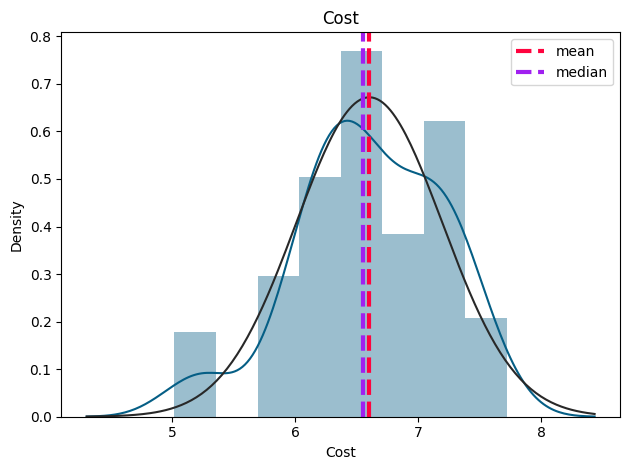

In [137]:
# Transform Your data
for i,col in enumerate(['Cost']) :
    sns.distplot(cluster_df[col], color = '#055E85', fit = norm);
    feature = cluster_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();

* Since I have applied capping method, it changes mean and median, hence trying to achieve normal distribution using log transformation which is a method for treating positive skewness.

Gaussian transformation generally used to convert data distribution into normal distribution.

#### <font color='#3792cb'> **7. Data Scaling**

In [138]:
# Scaling your data
cluster_dummy.sample(5)

Restaurant  Cost  Average_Rating  Total_Cuisine_Count  American  \
89  Mohammedia Shawarma  5.02            2.99                    2         0   
49        Mathura Vilas  6.22            2.82                    3         0   
42         Karachi Cafe  6.40            3.71                    3         0   
99     Chinese Pavilion  6.91            3.75                    2         0   
84              T Grill  6.55            3.17                    4         0   

    Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  Salad  \
89       0        1      0    0       0  ...             0      0      0   
49       0        0      0    0       0  ...             1      0      0   
42       0        0      0    0       0  ...             0      0      0   
99       0        0      0    0       0  ...             0      0      0   
84       1        0      0    0       0  ...             1      0      0   

    Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
89        0             0        0            1      0     0      0  
49        0             1        0            0      0     0      0  
42        0             0        0            0      0     0      0  
99        1             0        0            0      0     0      0  
84        0             0        0            0      0     0      0  

[5 rows x 48 columns]

In [139]:
#normalizing numerical columns
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

#### <font color='#3792cb'> 8. Dimesionality Reduction

In [140]:
# Dimensionality Reduction (If needed)
#applying pca
#setting restaurant feature as index as it still had categorial value
scaled_df.set_index(['Restaurant'],inplace=True)
features = scaled_df.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df[features])

PCA()

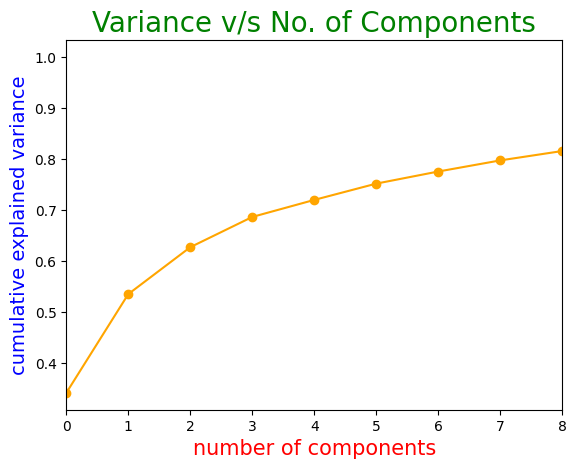

In [141]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [142]:
#using n_component as 3 
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.34148554 0.1936559  0.0919578 ]
Cumulative variance explained by 3 principal components: 62.71%


In [143]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 47)
transformed shape: (100, 3)


#### <font color='#3792cb'> 9. Data Splitting

In [144]:
# Split your data to train and test. Choose Splitting ratio wisely.
# for sentiment analysis using sentiment_df dataframe
X = X_tfidf #from text vectorization
y = sentiment_df['Sentiment']

In [145]:
sentiment_df.shape

(9961, 6)

In [146]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7968, 17333)
Number transactions y_train dataset:  (7968,)
Number transactions X_test dataset:  (1993, 17333)
Number transactions y_test dataset:  (1993,)


#### <font color='#3792cb'> 10. Handling Imbalanced Dataset

In [147]:
vc = sentiment_df.Sentiment.value_counts().reset_index().rename(columns={'count':'Count'})
print(vc)


   Sentiment  Count
0          1   6274
1          0   3687


In [148]:
majority_class = vc.Count[vc.Sentiment == 1].values[0]
minority_class = vc.Count[vc.Sentiment == 0].values[0]


In [149]:
#calculating cir value for checking class imbalance
CIR = majority_class / minority_class
print(CIR)

1.701654461621915


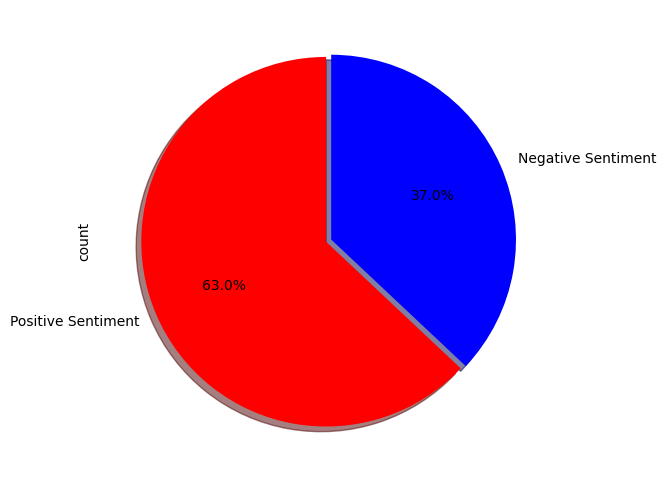

In [150]:
# Dependant Variable Column Visualization
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['red','blue'],
                               explode=[0.01,0.02]
                              )
plt.show()

# <font color='#FF3286'> **6. ML Model Implementation**

### <font color='#3792cb'> ML Model -1 : Clustering

#### <font color='#FF3286'> K-Means Clustering

K-Means Clustering is an Unsupervised Learning algorithm.The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.

Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

**ELBOW METHOD**

> This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. 

**SILHOUETTE METHOD**

> The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). 

In [151]:
#importing kmeans
from sklearn.cluster import KMeans

In [152]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

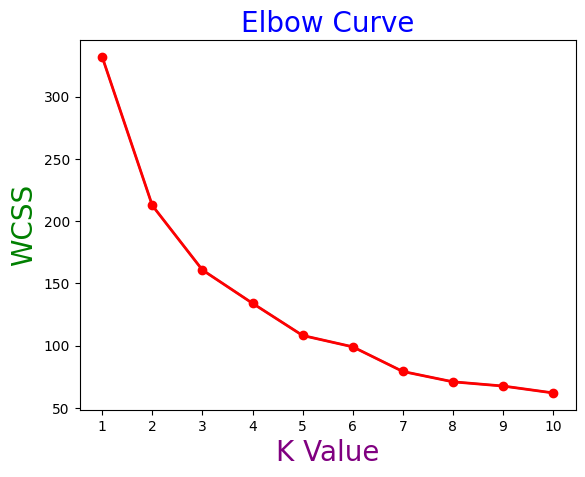

In [153]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

For n_clusters = 2 average silhouette_score is : 0.3135455601446337
For n_clusters = 3 average silhouette_score is : 0.2728246189812545
For n_clusters = 4 average silhouette_score is : 0.25428217911224726
For n_clusters = 5 average silhouette_score is : 0.2587525020357453
For n_clusters = 6 average silhouette_score is : 0.3133284003558649
For n_clusters = 7 average silhouette_score is : 0.29026077423695207
For n_clusters = 8 average silhouette_score is : 0.31171072859022475
For n_clusters = 9 average silhouette_score is : 0.30138820830478186


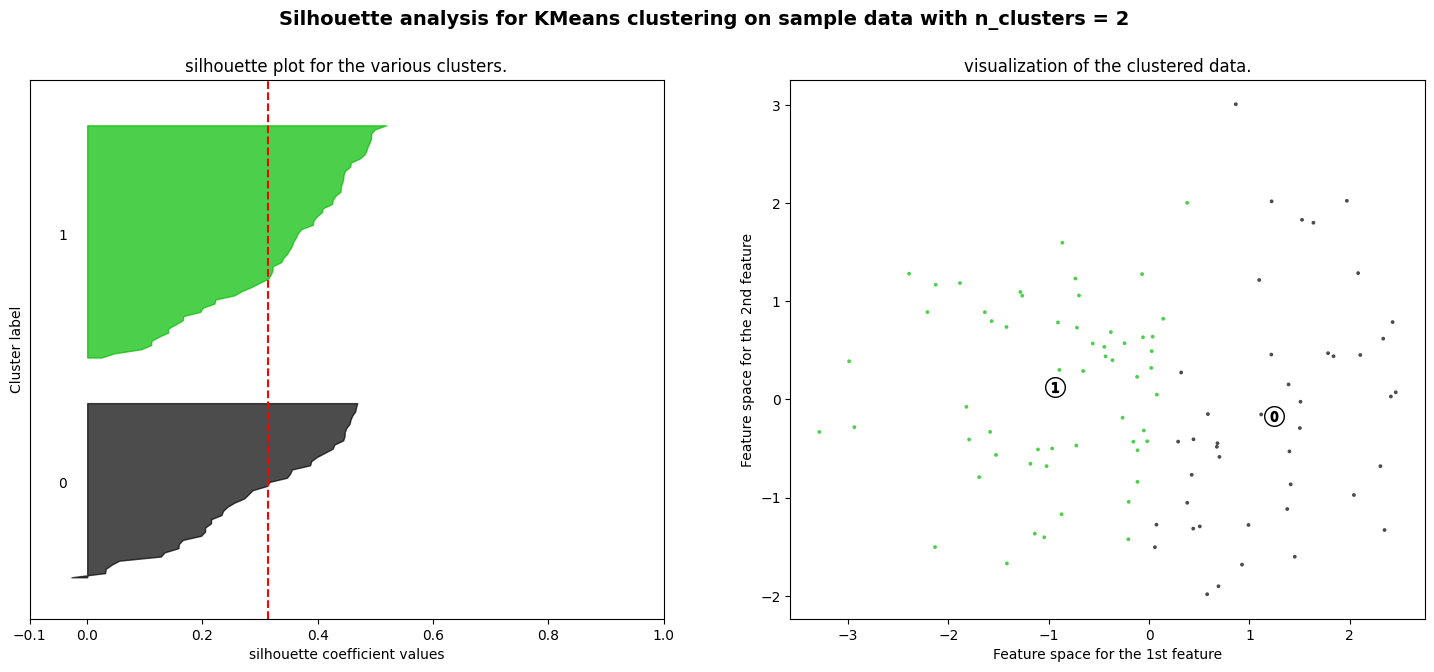

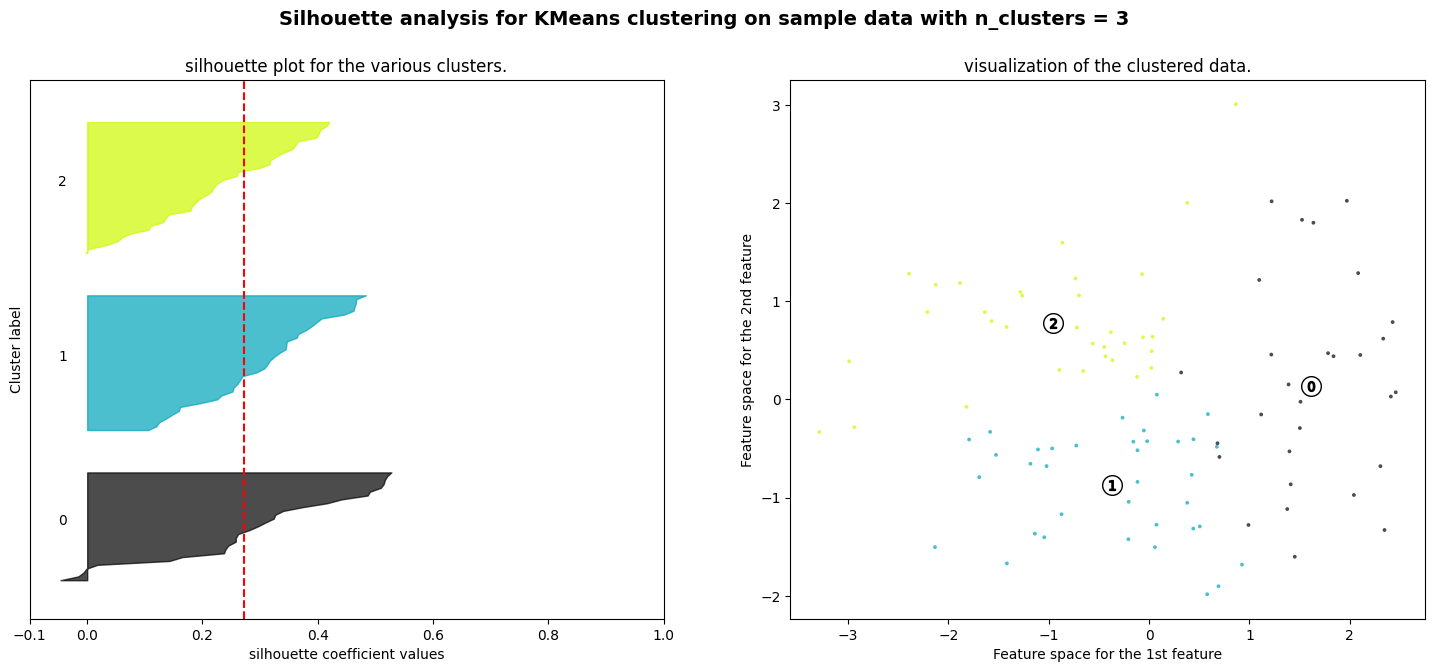

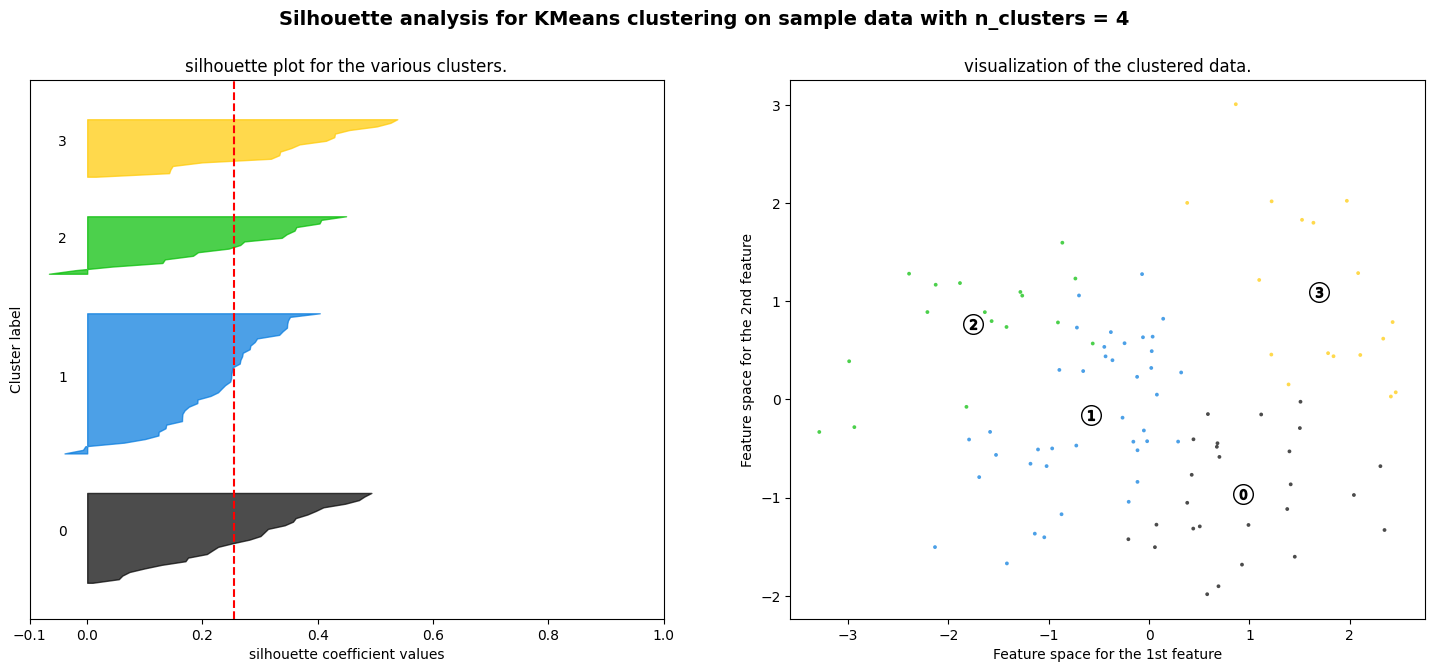

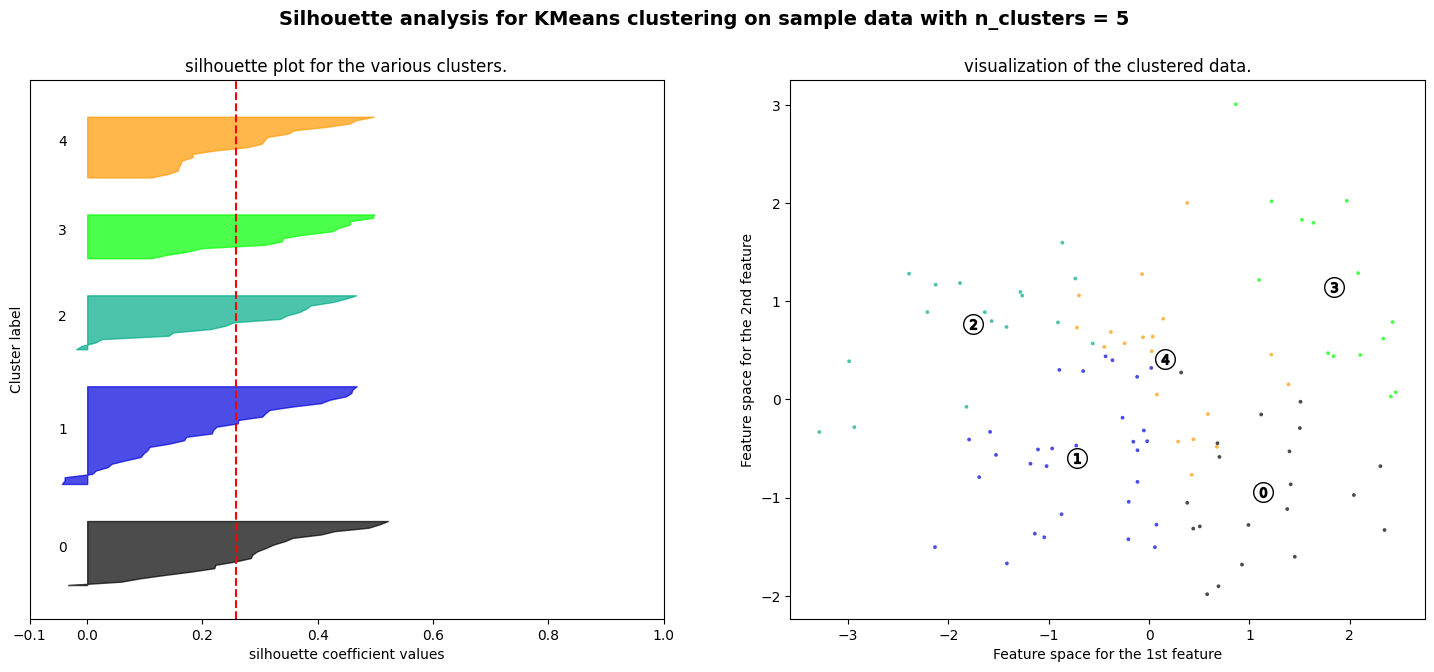

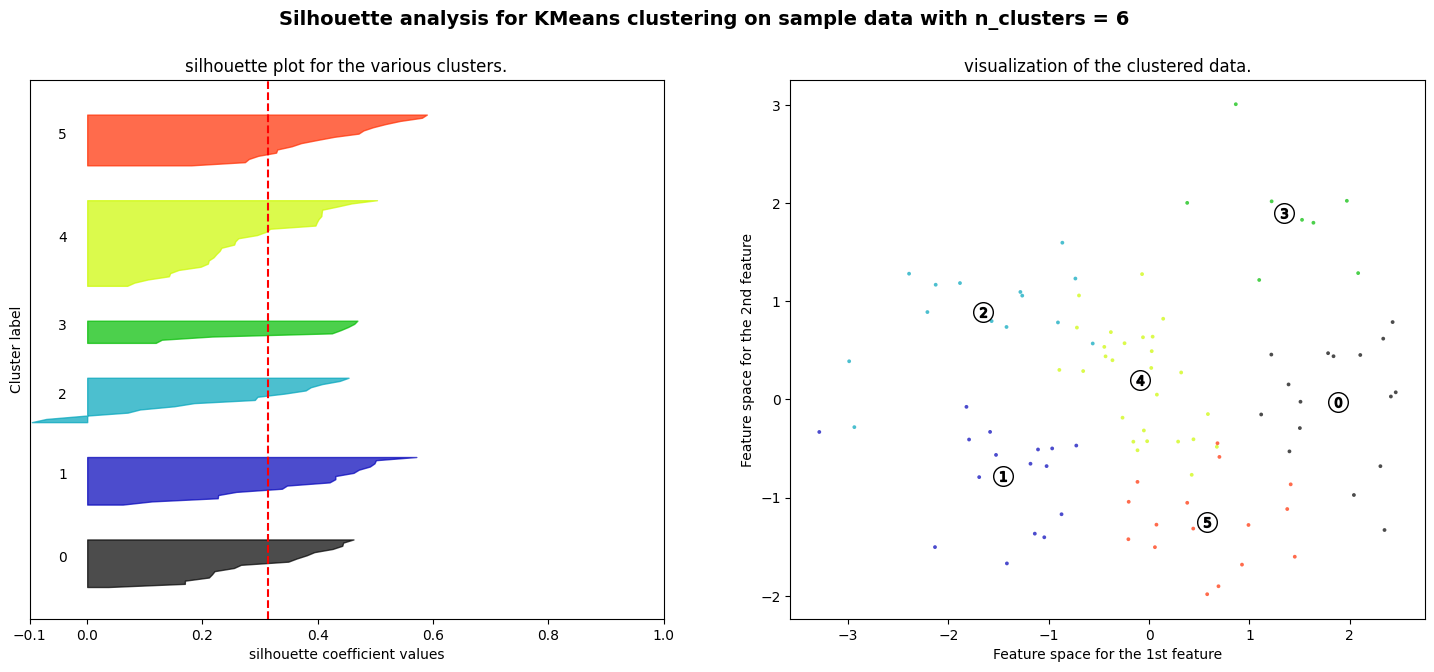

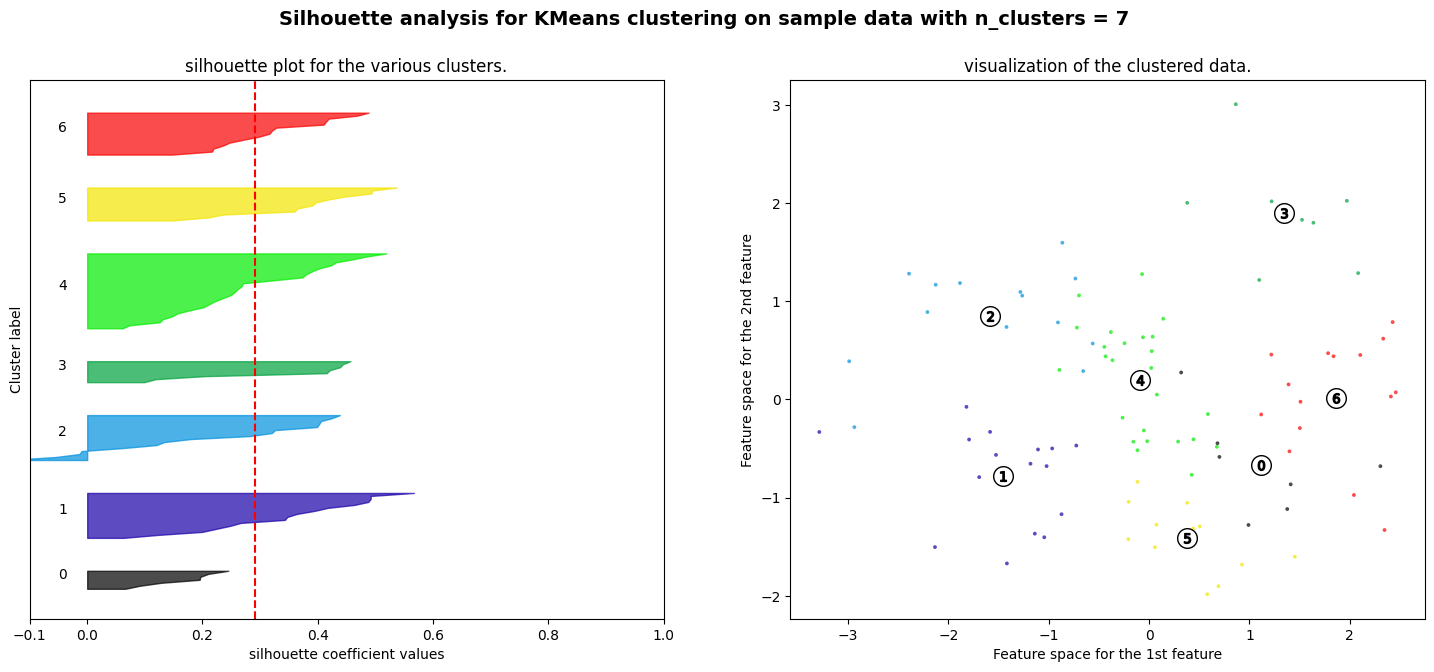

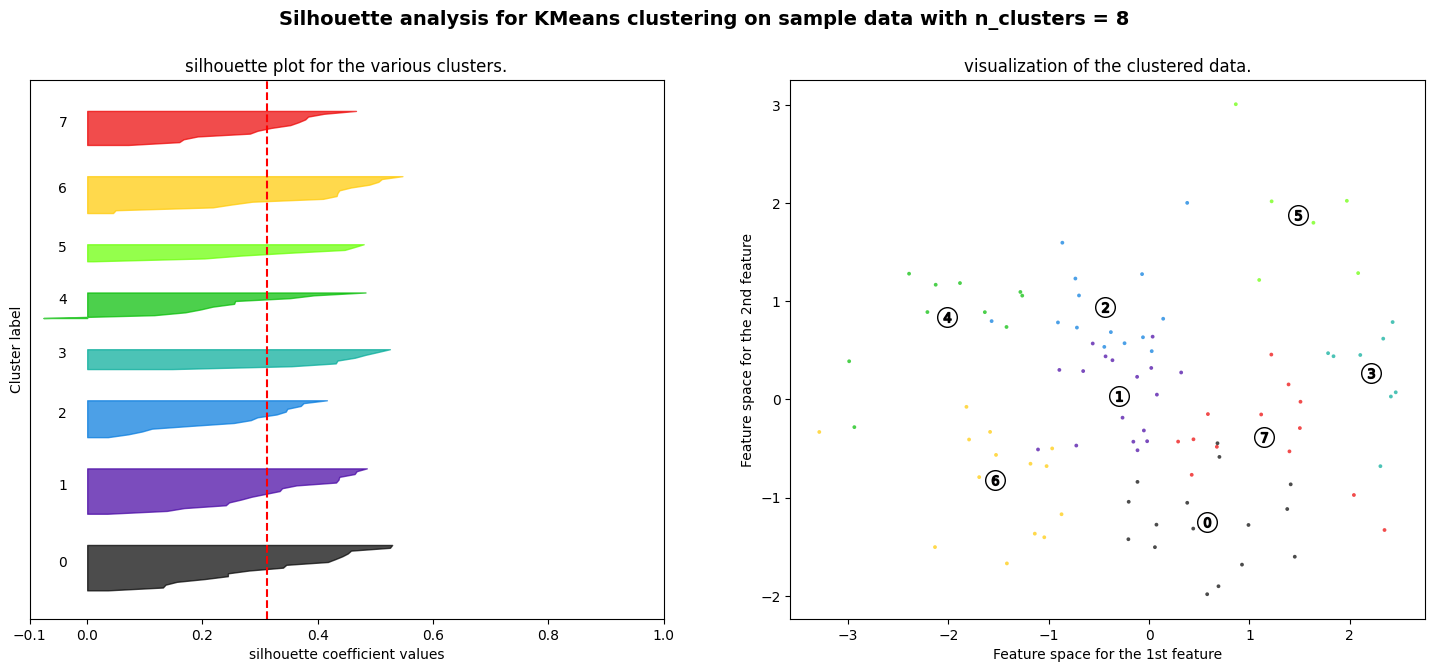

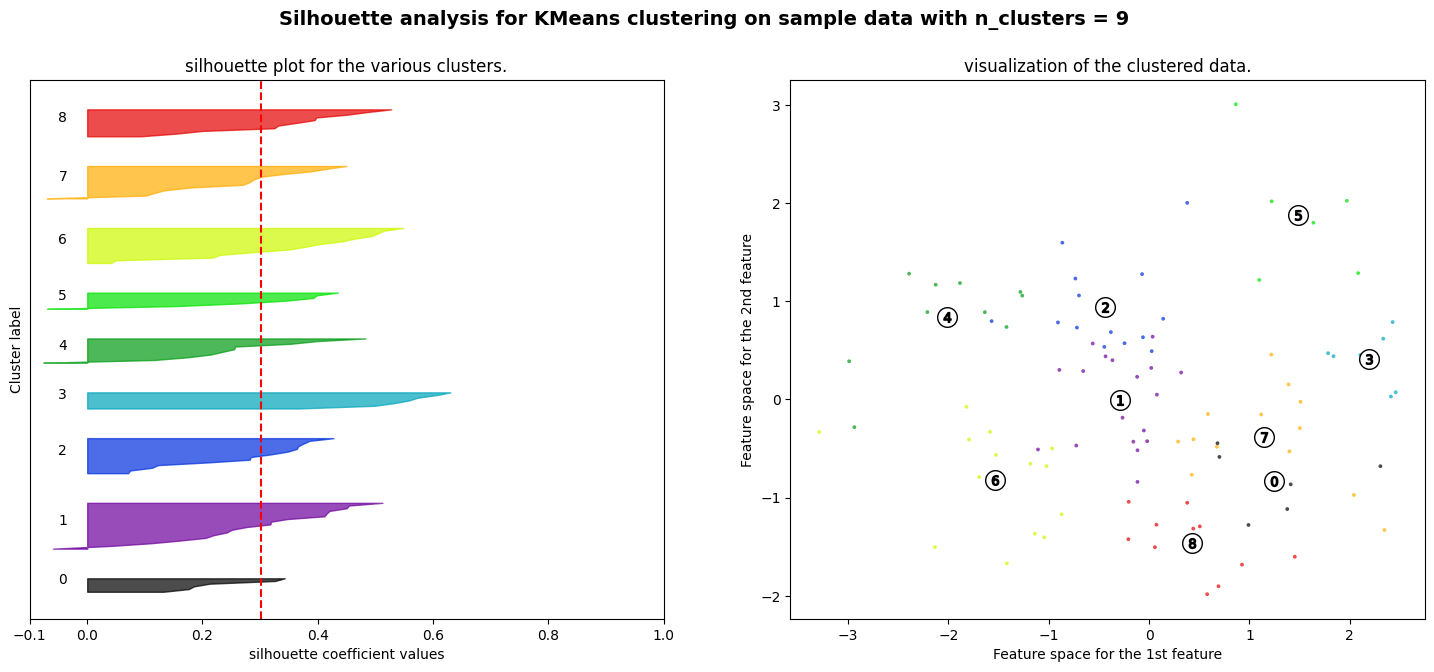

In [154]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='$%d$' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

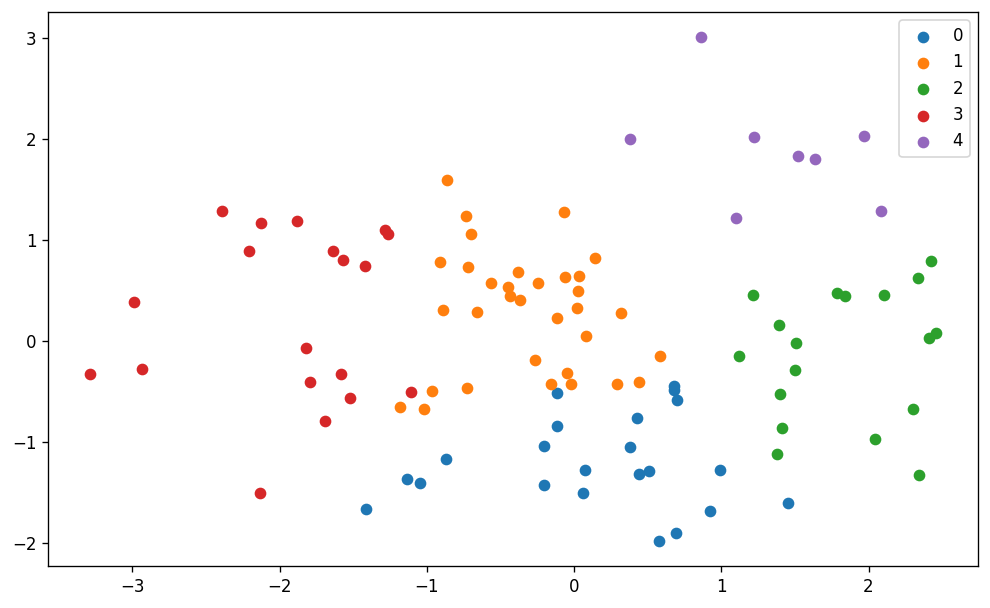

In [155]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [156]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

PC1   PC2   PC3  label
Restaurant                                    
Paradise               1.10  1.22 -0.84      4
Mustang Terrace Lounge 1.45 -1.60  0.15      0

In [157]:
#joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  \
Restaurant                                                              
La La Land - Bar & Kitchen  6.91            3.19                    4   
Karachi Cafe                6.40            3.71                    3   

                            American  Andhra  Arabian  Asian  BBQ  Bakery  \
Restaurant                                                                  
La La Land - Bar & Kitchen         0       0        0      0    0       0   
Karachi Cafe                       0       0        0      0    0       0   

                            Beverages  ...  Pizza  Salad  Seafood  \
Restaurant                             ...                          
La La Land - Bar & Kitchen          0  ...      0      0        0   
Karachi Cafe                        0  ...      0      0        0   

                            South Indian  Spanish  Street Food  Sushi  Thai  \
Restaurant                                                                    
La La Land - Bar & Kitchen             0        0            0      0     0   
Karachi Cafe                           0        0            0      0     0   

                            Wraps  label  
Restaurant                                
La La Land - Bar & Kitchen      0      0  
Karachi Cafe                    0      1  

[2 rows x 48 columns]

In [158]:
#changing back cost value to original from log1p done during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  \
Restaurant                                                                
Over The Moon Brew Company 1200.00            4.34                    5   
Olive Garden                700.00            3.76                    4   

                            American  Andhra  Arabian  Asian  BBQ  Bakery  \
Restaurant                                                                  
Over The Moon Brew Company         0       0        0      1    0       0   
Olive Garden                       0       0        0      0    0       0   

                            Beverages  ...  Pizza  Salad  Seafood  \
Restaurant                             ...                          
Over The Moon Brew Company          0  ...      0      0        0   
Olive Garden                        0  ...      0      0        0   

                            South Indian  Spanish  Street Food  Sushi  Thai  \
Restaurant                                                                    
Over The Moon Brew Company             0        0            0      0     0   
Olive Garden                           0        0            0      0     0   

                            Wraps  label  
Restaurant                                
Over The Moon Brew Company      0      2  
Olive Garden                    0      0  

[2 rows x 48 columns]

In [159]:
#creating df to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = hotel[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                            Cuisines    Cost  Average_Rating  \
0  Chinese, Continental, Kebab, European, South I...  800.00            4.28   
1                     Biryani, North Indian, Chinese  800.00            4.70   
2       Asian, Mediterranean, North Indian, Desserts 1300.00            4.66   
3  Biryani, North Indian, Chinese, Seafood, Bever...  800.00            3.21   
4  Asian, Continental, North Indian, Chinese, Med... 1200.00            4.34   

   Total_Cuisine_Count  label  
0                    6      2  
1                    3      4  
2                    4      4  
3                    5      0  
4                    5      2

In [160]:
# Counting content in each cluster
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

Total_Restaurant  count
1                 0     22
0                 1     33
3                 2     18
2                 3     19
4                 4      8

In [161]:
#creating new df for checkign cuising in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant      Cuisines    Cost  Average_Rating  \
80  Tandoori Food Works         Kebab  500.00            3.27   
71    Eat India Company  North Indian 1300.00            3.26   
66         Aromas@11SIX       Chinese  750.00            3.46   
15                  KFC     Fast Food  500.00            2.85   
54       Asian Meal Box         Asian  200.00            2.58   

    Total_Cuisine_Count  label  
80                    3      1  
71                    3      1  
66                    4      0  
15                    2      3  
54                    1      3

In [162]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 2 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Asian' 'Mediterranean' 'Seafood' 'Goan' 'American' 'BBQ' 'Japanese'
 'Italian' 'Salad' 'Sushi' 'Spanish' 'Modern Indian' 'Thai' 'Momos'] 

Cuisine List for Cluster : 4 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'European' 'American' 'BBQ' 'Modern Indian' 'Continental' 'Sushi'] 

Cuisine List for Cluster : 0 

['Biryani' 'North Indian' 'Chinese' 'Seafood' 'Beverages' 'Healthy Food'
 'Continental' 'South Indian' 'Mexican' 'Italian' 'Salad' 'Bakery'
 'Mughlai' 'Juices' 'Andhra' 'Hyderabadi' 'Finger Food' 'Kebab' 'Thai'
 'Indonesian' 'Asian' 'Fast Food' 'Desserts' 'Cafe' 'Burger'] 

Cuisine List for Cluster : 3 

['Lebanese' 'Ice Cream' 'Desserts' 'Street Food' 'North Indian'
 'Fast Food' 'Burger' 'Chinese' 'Mughlai' 'Biryani' 'Asian' 'Beverages'
 'Bakery' 'Momos' 'Cafe' 'Pizza' 'Arabian'] 

Cuisine List for Cluster : 1 

['Continental' 'American' 'Chine

#### <font color ="#E6E6FA"> Agglomerative Hierarchical Clustering

Hierarchial clustering algorithms group similar objects into groups called clusters. There are two types of hierarchical clustering algorithms:

Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters. Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

**Agglomerative hierarchical clustering** 
> The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets. This hierarchy of clusters is represented in the form of the dendrogram.

**Dendrogram in Hierarchical clustering**

> The dendrogram is a tree-like structure that is mainly used to store each step as a memory that the HC algorithm performs. In the dendrogram plot, the Y-axis shows the Euclidean distances between the data points, and the x-axis shows all the data points of the given dataset.

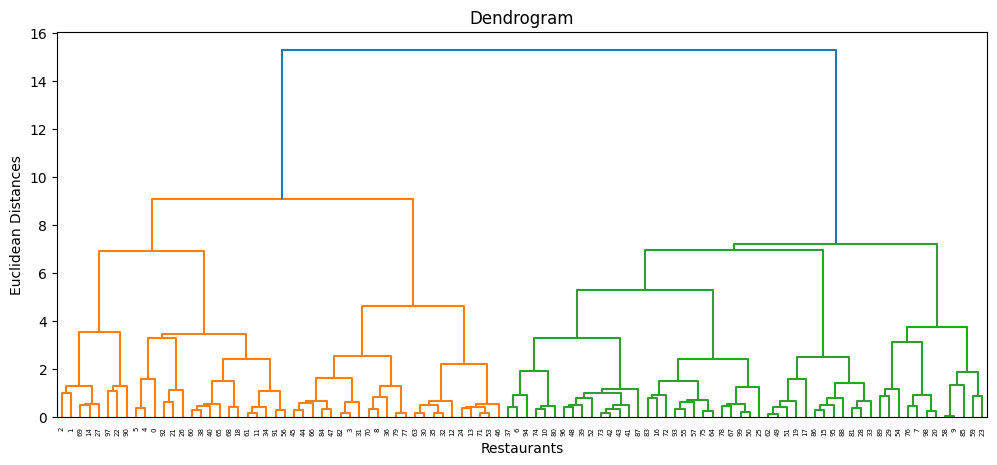

In [163]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [164]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2956641953323888
For n_clusters = 3, silhouette score is 0.22528398856680534
For n_clusters = 4, silhouette score is 0.20865729675680533
For n_clusters = 5, silhouette score is 0.2466524590302819
For n_clusters = 6, silhouette score is 0.27119012773344164
For n_clusters = 7, silhouette score is 0.26861108935379185
For n_clusters = 8, silhouette score is 0.2815077022408657
For n_clusters = 9, silhouette score is 0.288036427814913
For n_clusters = 10, silhouette score is 0.288545043237222
For n_clusters = 11, silhouette score is 0.29952838233213475
For n_clusters = 12, silhouette score is 0.314288579339677
For n_clusters = 13, silhouette score is 0.31583604234420365
For n_clusters = 14, silhouette score is 0.3273629599939925
For n_clusters = 15, silhouette score is 0.3365526906810896


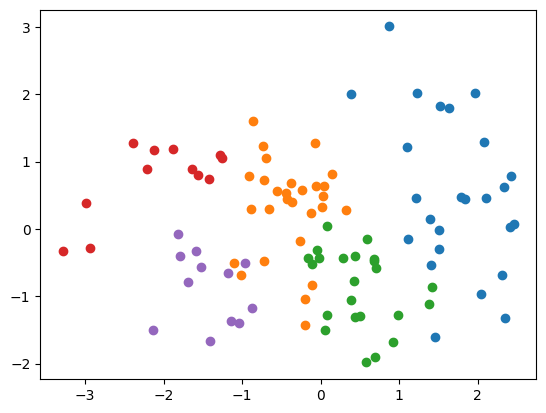

Silhouette Coefficient: 0.247
davies_bouldin_score 1.151


In [165]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

In [166]:
#creating new colummn for predicting cluster using hierarcial clsutering
clustering_result['label_hr'] = y_hc

In [167]:
clustering_result.sample(5)

Restaurant                                 Cuisines  \
23                           Amul                      Ice Cream, Desserts   
24                          SKYHY       North Indian, Chinese, Continental   
66                   Aromas@11SIX  North Indian, Chinese, Mughlai, Biryani   
47                Shanghai Chef 2         Chinese, Thai, Indonesian, Asian   
13  The Lal Street - Bar Exchange       North Indian, Italian, Finger Food   

      Cost  Average_Rating  Total_Cuisine_Count  label  label_hr  
23  150.00            3.94                    2      3         3  
24 1400.00            3.37                    3      0         2  
66  750.00            3.46                    4      0         2  
47  800.00            3.06                    4      0         2  
13 1300.00            3.45                    3      1         2

In [168]:
scaled_df.to_csv('scaled_data.csv', index=False)


⚡ **K-means** and **hierarchical clustering** are two different methods for grouping data points into clusters. K-means is a centroid-based method, where each cluster is defined by the mean of the data points assigned to it. Hierarchical clustering, on the other hand,HC is a linkage-based method, where clusters are defined by the similarity of data points. Because these methods use different criteria to define clusters, the labels they assign to data points can be different. Additionally, the number of clusters and initialization of the algorithm can also affect the outcome, which can cause the labels to differ.

#### <font color="#E6E6FA"> 1. Explaination of ML Model used and it's performance using Evaluation metric Score Chart.

**KMeans Clustering**
> I applied K means Clustering to cluster the Restaurants based on the given features. I used both the Elbow and Silhuoette Methods to get an efficient number of K, and we discovered that n clusters = 6 was best for our model. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K means.labels. After labelling the clusters, we visualised them and counted the number of restaurants in each cluster, discovering that the majority of the restaurants belonged to the first cluster.

**Agglomerative Hierarchical Clustering**
> I have used Hierarchial Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a down-top approach to cluster the data. I have used Silhouette Coefficient Score and used clusters = 6 and then vizualized the clusters and the datapoints within it.

### <font color='#3792cb'> ML Model - 2 : Sentiment Analysis

#### Unsupervised Sentiment Analysis

**LDA**

In [169]:
#calculating silhouette score for n_component
from sklearn.metrics import silhouette_score

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))


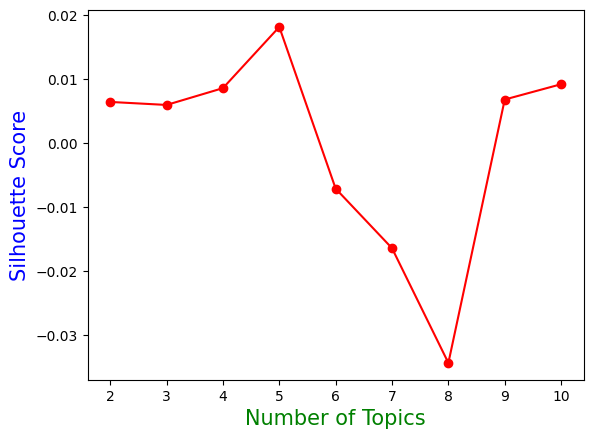

In [170]:
#plotting silhouette score 
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

In [171]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [172]:
# Assuming lda, X, and vectorizer are defined
visualization = pyLDAvis.prepare(
    topic_term_dists=lda.components_,
    doc_topic_dists=lda.transform(X),
    doc_lengths=np.array(X.sum(axis=1)).flatten(),
    vocab=vectorizer.get_feature_names_out(),
    term_frequency=np.array(X.sum(axis=0)).flatten(),
    mds='tsne'
)

# Display visualization in a Jupyter Notebook
pyLDAvis.display(visualization)


In [173]:
#creating copy to store predicted sentiments
review_sentiment_prediction = review[review_df.columns.to_list()].copy()
review_sentiment_prediction.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...    5.00   
1  Ambience is too good for a pleasant evening. S...    5.00   
2  A must try.. great food great ambience. Thnx f...    5.00   
3  Soumen das and Arun was a great guy. Only beca...    5.00   
4  Food is good.we ordered Kodi drumsticks and ba...    5.00   

                  Metadata                Time  Pictures  
0   1 Review , 2 Followers 2019-05-25 15:54:00         0  
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0  
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0  
3    1 Review , 1 Follower 2019-05-24 22:11:00         0  
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0

In [174]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(X)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)

Restaurant                  Reviewer  \
4184                           Karachi Bakery           Råñjith Kümår M   
1592                                      KFC                 Rama Raju   
6302                             Dine O China          Pradeep Bindhani   
3840                          The Glass Onion  Satyanarayan Reddy Konda   
9115  Cascade - Radisson Hyderabad Hitec City               Arpit Gupta   

                                                 Review  Rating  \
4184                                     cake was yummy    5.00   
1592                                               nice    4.00   
6302  Nice ambison great food and good service so st...    5.00   
3840  The ambience is outstanding, we went in for di...    5.00   
9115  Had lunch just there. Amazing ambience and ser...    5.00   

                     Metadata                Time  Pictures  Prediction  
4184  1 Review , 13 Followers 2018-07-19 16:23:00         0           2  
1592                2 Reviews 2018-07-25 17:06:00         0           0  
6302                 1 Review 2019-05-23 20:12:00         1           0  
3840    1 Review , 1 Follower 2019-04-20 23:37:00         0           2  
9115  2 Reviews , 6 Followers 2019-03-10 15:08:00         0           0

🗒argmax(axis=1) returns the index of the topic that has the highest probability for each sample, it finds the topic that has the highest probability of describing each sample in the dataset

TOP 100 WORDS FOR TOPIC #0


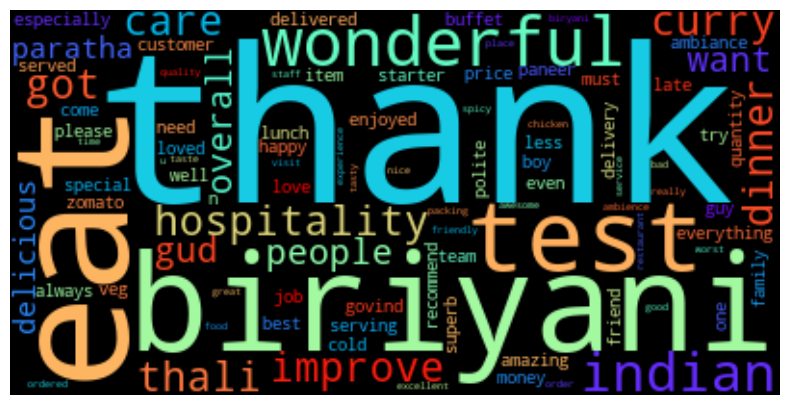

TOP 100 WORDS FOR TOPIC #1


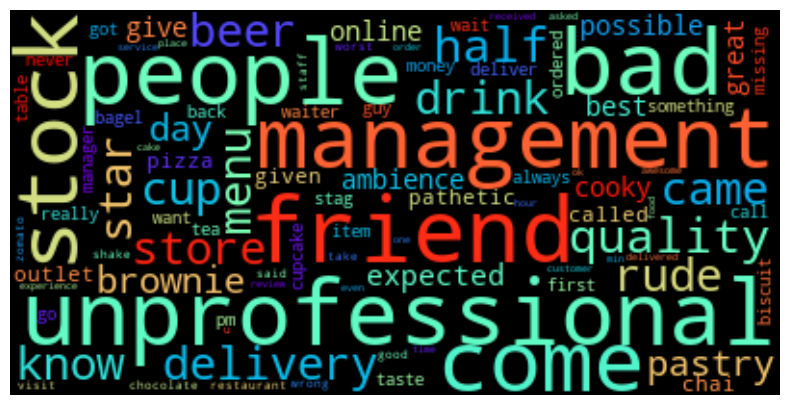

TOP 100 WORDS FOR TOPIC #2


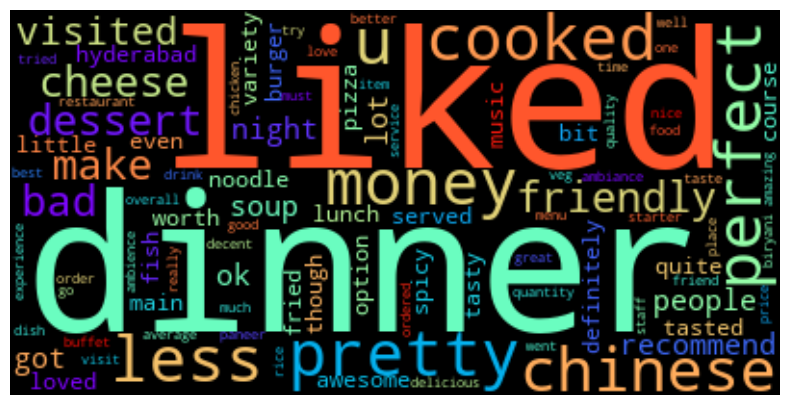

TOP 100 WORDS FOR TOPIC #3


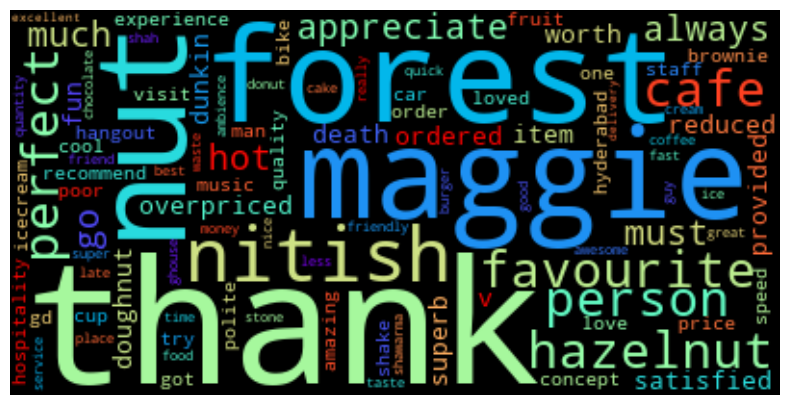

In [175]:
# #worcloud 
# # Define the number of words to include in the word cloud
# N = 100

# # Create a list of strings for each topic
# topic_text = []
# for index, topic in enumerate(lda.components_):
#     topic_words = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-N:]]
#     topic_text.append(" ".join(topic_words))

# # Create a word cloud for each topic
# for i in range(len(topic_text)):
#     print(f'TOP 100 WORDS FOR TOPIC #{i}')
#     wordcloud = WordCloud(background_color="black",colormap='rainbow').generate(topic_text[i])
#     plt.figure(figsize=(10,5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off")
#     plt.show()
#     print('='*120)

N = 100

# Create a list of strings for each topic
topic_text = []
for index, topic in enumerate(lda.components_):
    # Use get_feature_names_out() instead of get_feature_names()
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-N:]]
    topic_text.append(" ".join(topic_words))

# Create a word cloud for each topic
for i, text in enumerate(topic_text):
    print(f'TOP 100 WORDS FOR TOPIC #{i}')
    wordcloud = WordCloud(background_color="black", colormap='rainbow').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('=' * 120)

In [176]:
for sentiment in review_sentiment_prediction['Prediction'].unique().tolist():
  print('Prediction = ',sentiment,'\n')
  print(review_sentiment_prediction[review_sentiment_prediction['Prediction'] == 
        sentiment]['Rating'].value_counts())
  print('='*120)

Prediction =  2 

Rating
5.00    1984
4.00    1935
3.00     964
1.00     871
2.00     479
4.50      53
3.50      42
2.50      14
1.50       9
Name: count, dtype: int64
Prediction =  0 

Rating
5.00    1316
1.00     498
4.00     295
3.00     150
2.00     138
4.50       8
2.50       2
3.50       2
Name: count, dtype: int64
Prediction =  1 

Rating
1.00    285
5.00    165
4.00     53
3.00     46
2.00     35
4.50      5
2.50      3
3.50      3
Name: count, dtype: int64
Prediction =  3 

Rating
5.00    367
4.00     90
1.00     81
3.00     33
2.00     32
4.50      3
Name: count, dtype: int64


* LDA is an unsupervised learning algorithm, it doesn't have any predefined labels. The labels are assigned based on the analysis done on the words, the weights of the words, and the context of the words in each topic.

 So, the predicted topic is not a definite answer, therfore experimenting with different techniques like using supervised algorithm and combining the results to make a more accurate sentiment labeling.





#### <font color ='sky blue'>  Supervised Sentiment Analysis

* Combining supervised learning to know better about sentiments. 

In [177]:
#defining function to calculate score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from tabulate import tabulate
import itertools


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision], 
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

**Logistic Regression**

In [178]:
#logisctic regression
from sklearn.linear_model import LogisticRegression

# create and fit the model
clf = LogisticRegression()

**XgBoost**

In [179]:
#XgBoost
from xgboost import XGBClassifier

#create and fit the model
xgb = XGBClassifier()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Logistic Regression**

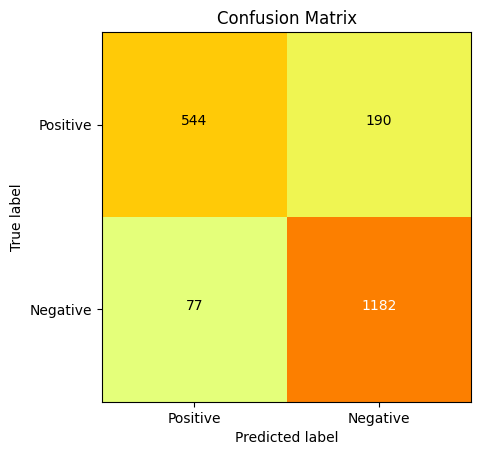

[[ 544  190]
 [  77 1182]]
Metric        Score
---------  --------
ROC AUC    0.839992
Precision  0.861516
Recall     0.93884
F1         0.898518
Accuracy   0.866031


In [180]:
# Visualizing evaluation Metric Score chart for logistic regression
# printing result
print_table(clf, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 543 instances are labeled as True Positive (correctly predicted as positive)
* 174 instances are labeled as False Positive (incorrectly predicted as positive)
* 1195 instances are labeled as True Negative (correctly predicted as negative)
* 81 instances are labeled as False Negative (incorrectly predicted as negative)

**XgBoost**

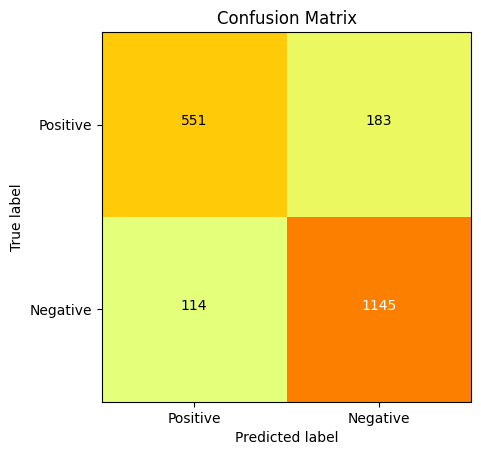

[[ 551  183]
 [ 114 1145]]
Metric        Score
---------  --------
ROC AUC    0.830067
Precision  0.862199
Recall     0.909452
F1         0.885195
Accuracy   0.850978


In [181]:
# Visualizing evaluation Metric Score chart for XgBoost
# printing result
print_table(xgb, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 558 instances are labeled as True Positive (correctly predicted as positive)
* 159 instances are labeled as False Positive (incorrectly predicted as positive)
* 1156 instances are labeled as True Negative (correctly predicted as negative)
* 120 instances are labeled as False Negative (incorrectly predicted as negative)

#### <font color =  "sky blue"> 2. Cross- Validation 

**Logistic Regression**

In [182]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#logistic regression
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]} 
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ......C=1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ......C=1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ......C=1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ......C=1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ..C=0.1, max_iter=1000, penalty=l2;, score=0.982 total time=   0.0s
[CV 5/5] END ......C=1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..C=0.1, max_iter=1000, penalty=l2;

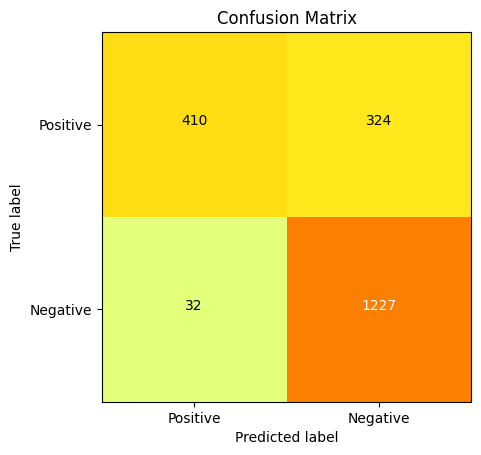

[[ 410  324]
 [  32 1227]]
Metric        Score
---------  --------
ROC AUC    0.766583
Precision  0.791103
Recall     0.974583
F1         0.87331
Accuracy   0.821375


In [183]:
# printing result
print_table(clf_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 413 instances are labeled as True Positive (correctly predicted as positive)
* 304 instances are labeled as False Positive (incorrectly predicted as positive)
* 1243 instances are labeled as True Negative (correctly predicted as negative)
* 33 instances are labeled as False Negative (incorrectly predicted as negative)

**XgBoost**

In [184]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn

[CV 3/3] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.886 total time=   4.1s
[CV 1/3] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.919 total time=   4.2s
[CV 2/3] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.908 total time=   4.3s


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END criterion=entropy, max_depth=7, n_estimators=125;, score=0.914 total time=   4.8s
[CV 3/3] END criterion=entropy, max_depth=7, n_estimators=125;, score=0.888 total time=   4.9s


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END criterion=entropy, max_depth=7, n_estimators=125;, score=0.908 total time=   5.0s


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END criterion=entropy, max_depth=7, n_estimators=150;, score=0.901 total time=   5.7s
[CV 1/3] END criterion=entropy, max_depth=7, n_estimators=150;, score=0.914 total time=   5.7s


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END criterion=entropy, max_depth=7, n_estimators=150;, score=0.893 total time=   6.0s


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.914 total time=   6.3s


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.901 total time=   6.5s


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.888 total time=   6.4s


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END criterion=entropy, max_depth=10, n_estimators=125;, score=0.912 total time=   7.7s
[CV 2/3] END criterion=entropy, max_depth=10, n_estimators=125;, score=0.903 total time=   7.6s


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END criterion=entropy, max_depth=10, n_estimators=125;, score=0.891 total time=   7.8s


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.913 total time=   9.5s


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.902 total time=  10.0s
[CV 3/3] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.892 total time=   9.8s


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END criterion=entropy, max_depth=15, n_estimators=100;, score=0.912 total time=  11.9s
[CV 2/3] END criterion=entropy, max_depth=15, n_estimators=100;, score=0.909 total time=  11.6s


/Users/divyagoyal/Projects/Global_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:08:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END criterion=entropy, max_depth=15, n_estimators=100;, score=0.889 total time=  12.3s
[CV 1/3] END criterion=entropy, max_depth=15, n_estimators=125;, score=0.913 total time=  13.4s
[CV 2/3] END criterion=entropy, max_depth=15, n_estimators=125;, score=0.909 total time=  12.9s
[CV 3/3] END criterion=entropy, max_depth=15, n_estimators=125;, score=0.891 total time=  12.0s
[CV 1/3] END criterion=entropy, max_depth=15, n_estimators=150;, score=0.927 total time=  10.6s
[CV 2/3] END criterion=entropy, max_depth=15, n_estimators=150;, score=0.906 total time=  10.5s
[CV 3/3] END criterion=entropy, max_depth=15, n_estimators=150;, score=0.890 total time=   9.4s


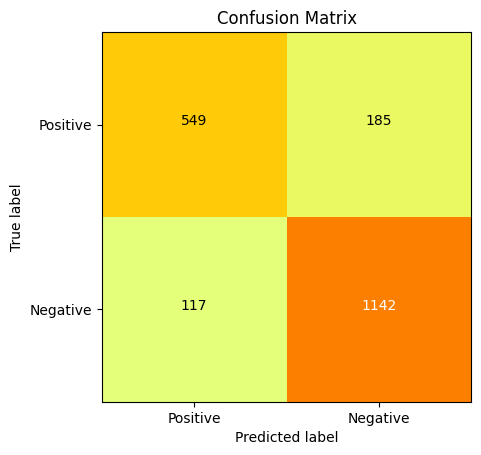

[[ 549  185]
 [ 117 1142]]
Metric        Score
---------  --------
ROC AUC    0.827513
Precision  0.860588
Recall     0.907069
F1         0.883217
Accuracy   0.84847


In [185]:
# printing result for gridsearch Xgb
print_table(xgb_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 552 instances are labeled as True Positive (correctly predicted as positive)
* 122 instances are labeled as False Positive (incorrectly predicted as positive)
* 1154 instances are labeled as True Negative (correctly predicted as negative)
* 165 instances are labeled as False Negative (incorrectly predicted as negative)

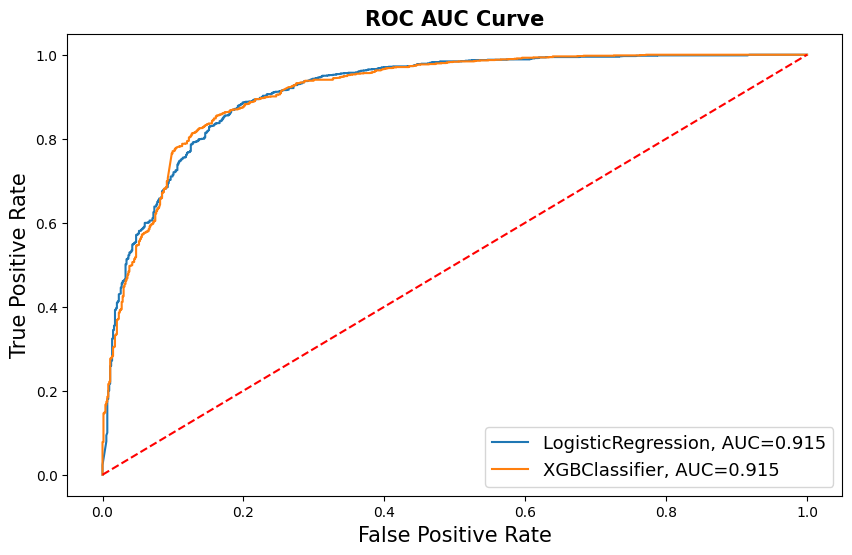

In [186]:
# Import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `clf_grid` and `xgb_grid` are defined and already fitted
# Finding the best parameters for all the models
log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

# Predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[:, 1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[:, 1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                     (xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for pair in classifiers_proba:
    fpr, tpr, _ = roc_curve(y_test, pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    # Append the new row using pd.concat
    result_table = pd.concat([result_table, 
                              pd.DataFrame({'classifiers': [pair[0].__class__.__name__],
                                            'fpr': [fpr], 
                                            'tpr': [tpr], 
                                            'auc': [auc]})], 
                             ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Plotting the ROC AUC curve for all models
fig = plt.figure(figsize=(10, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], 'r--')

plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()


### <font color='#FF3286'> ML Model - 3 Recommendation System

#### <font color='#3792cb'> **Content-Based Filtering**

##### Recommendation based on user profile and restaurant genre

In [187]:
#creating variable that contain restaurant cuisine details
restaurant_df = cluster_dummy.copy()
restaurant_df = restaurant_df.reset_index()
restaurant_df = restaurant_df.drop(columns = ['Cost',	'Average_Rating',	'Total_Cuisine_Count','label'], axis =1)
restaurant_df.head(2)

Restaurant  American  Andhra  Arabian  Asian  BBQ  Bakery  Beverages  \
0  Beyond Flavours         0       0        0      0    0       0          0   
1         Paradise         0       0        0      0    0       0          0   

   Biryani  Burger  ...  North Indian  Pizza  Salad  Seafood  South Indian  \
0        0       0  ...             1      0      0        0             1   
1        1       0  ...             1      0      0        0             0   

   Spanish  Street Food  Sushi  Thai  Wraps  
0        0            0      0     0      0  
1        0            0      0     0      0  

[2 rows x 45 columns]

In [188]:
#shape
restaurant_df.shape

(100, 45)

In [189]:
#restaurant matrix
rest_genre = restaurant_df.loc[:, restaurant_df.columns != 'Restaurant']
rest_matrix = rest_genre.values
rest_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [190]:
#matrix shape
rest_matrix.shape

(100, 44)

In [191]:
#creating user or reviewer profile
user_df = sentiment_df[['Reviewer',	'Restaurant',	'Rating']].copy()
user_df.head()

Reviewer       Restaurant  Rating
0     Rusha Chakraborty  Beyond Flavours    5.00
1  Anusha Tirumalaneedi  Beyond Flavours    5.00
2       Ashok Shekhawat  Beyond Flavours    5.00
3        Swapnil Sarkar  Beyond Flavours    5.00
4                Dileep  Beyond Flavours    5.00

In [192]:
#shape
user_df.shape

(9961, 3)

In [193]:
# grouping the data by the 'user' column
grouped_data = user_df.groupby('Reviewer')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Rating': row['Rating']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
user_rating = grouped_data.apply(create_new_column)
user_rating = user_rating.reset_index().rename(columns ={0:'Rated_Restaurant'})
user_rating.head()

Reviewer  \
0                    #FOODPORN   
1          #chloesviews // CAH   
2                         $ign   
3                     4mybanti   
4  @FuloriBinaChutneyKaiseBani   

                                    Rated_Restaurant  
0  [{'Restaurant': 'Zega - Sheraton Hyderabad Hot...  
1         [{'Restaurant': 'eat.fit', 'Rating': 5.0}]  
2           [{'Restaurant': 'SKYHY', 'Rating': 4.0}]  
3      [{'Restaurant': 'Ulavacharu', 'Rating': 2.0}]  
4  [{'Restaurant': 'Chinese Pavilion', 'Rating': ...

In [194]:
#shape
user_rating.shape

(7446, 2)

In [195]:
#iterating over user rating df such that it end up making an array which had same shape as restaurant df
user_rated_restaurant = {}
for index, row in user_rating.iterrows():
    user_rated_restaurant[row['Reviewer']] = {}
    for i in range(len(row['Rated_Restaurant'])):
        user_rated_restaurant[row['Reviewer']][row['Rated_Restaurant'][i][
            'Restaurant']] = row['Rated_Restaurant'][i]['Rating']

# creating an empty user preference vector for each user
user_preference_vector = pd.DataFrame(np.zeros((len(user_rating), len(restaurant_df))), 
                      columns=restaurant_df.Restaurant, index=user_rating['Reviewer'])

# Iterate through the user rating dataframe
for index, row in user_rating.iterrows():
    for i in range(len(row['Rated_Restaurant'])):
        restaurant = row['Rated_Restaurant'][i]['Restaurant']
        rating = row['Rated_Restaurant'][i]['Rating']
        user_preference_vector.loc[row['Reviewer'], restaurant] = rating

#reset index
user_preference_vector = user_preference_vector.reset_index()

In [196]:
#getting output
user_preference_vector.sample(5)

Restaurant        Reviewer  Beyond Flavours  Paradise  Flechazo  \
6644                  Syam             0.00      0.00      0.00   
2482            Kalyan Sai             0.00      0.00      0.00   
4358        Raagini Biswas             0.00      0.00      0.00   
3647           Nidhi Mehra             0.00      0.00      0.00   
6798          Thejas Simon             0.00      0.00      0.00   

Restaurant  Shah Ghouse Hotel & Restaurant  Over The Moon Brew Company  \
6644                                  0.00                        0.00   
2482                                  0.00                        0.00   
4358                                  0.00                        0.00   
3647                                  0.00                        0.00   
6798                                  0.00                        0.00   

Restaurant  The Fisherman's Wharf  eat.fit  Shah Ghouse Spl Shawarma  \
6644                         0.00     0.00                      0.00   
2482                         0.00     0.00                      0.00   
4358                         0.00     0.00                      0.00   
3647                         0.00     0.00                      0.00   
6798                         0.00     0.00                      0.00   

Restaurant  Hyper Local  ...  Arena Eleven  \
6644               0.00  ...          0.00   
2482               0.00  ...          0.00   
4358               0.00  ...          0.00   
3647               0.00  ...          0.00   
6798               0.00  ...          0.00   

Restaurant  Cascade - Radisson Hyderabad Hitec City  \
6644                                           0.00   
2482                                           0.00   
4358                                           0.00   
3647                                           0.00   
6798                                           0.00   

Restaurant  Collage - Hyatt Hyderabad Gachibowli  Zing's Northeast Kitchen  \
6644                                        0.00                      0.00   
2482                                        0.00                      0.00   
4358                                        0.00                      0.00   
3647                                        0.00                      0.00   
6798                                        4.00                      0.00   

Restaurant  Dunkin' Donuts  Desi Bytes  Hyderabadi Daawat  \
6644                  0.00        0.00               0.00   
2482                  0.00        0.00               0.00   
4358                  0.00        0.00               0.00   
3647                  0.00        0.00               0.00   
6798                  0.00        0.00               0.00   

Restaurant  Zega - Sheraton Hyderabad Hotel  Triptify  Chinese Pavilion  
6644                                   0.00      0.00              0.00  
2482                                   0.00      0.00              0.00  
4358                                   0.00      0.00              0.00  
3647                                   0.00      0.00              0.00  
6798                                   0.00      0.00              0.00  

[5 rows x 101 columns]

In [197]:
result_rows = []  # Use a list to store rows
for index, row in user_preference_vector.iterrows():
    user_preference_vector_array = row[1:].values.reshape(1, -1)
    dot_product = np.dot(user_preference_vector_array, rest_matrix)
    
    # Create a DataFrame for the current dot product and add to result_rows
    current_row = pd.DataFrame(dot_product, 
                               columns=rest_genre.columns, 
                               index=[row['Reviewer']])
    result_rows.append(current_row)

# Concatenate all rows into the result DataFrame
result_df = pd.concat(result_rows)

# Reset index and rename columns
result_df = result_df.reset_index().rename(columns={'index': 'Reviewer'})


In [198]:
#getting output
result_df[:5]

Reviewer American Andhra Arabian Asian  BBQ Bakery  \
0                    #FOODPORN     0.00   0.00    0.00  5.00 0.00   0.00   
1          #chloesviews // CAH     0.00   0.00    0.00  0.00 0.00   0.00   
2                         $ign     0.00   0.00    0.00  0.00 0.00   0.00   
3                     4mybanti     0.00   2.00    0.00  0.00 0.00   0.00   
4  @FuloriBinaChutneyKaiseBani     0.00   0.00    0.00  0.00 0.00   0.00   

  Beverages Biryani Burger  ... North Indian Pizza Salad Seafood South Indian  \
0      0.00    0.00   0.00  ...         0.00  0.00  0.00    0.00         0.00   
1      0.00    0.00   0.00  ...         5.00  0.00  0.00    0.00         5.00   
2      0.00    0.00   0.00  ...         4.00  0.00  0.00    0.00         0.00   
3      0.00    0.00   0.00  ...         2.00  0.00  0.00    0.00         0.00   
4      0.00    0.00   0.00  ...         0.00  0.00  0.00    5.00         0.00   

  Spanish Street Food Sushi Thai Wraps  
0    0.00        0.00  5.00 0.00  0.00  
1    0.00        0.00  0.00 0.00  0.00  
2    0.00        0.00  0.00 0.00  0.00  
3    0.00        0.00  0.00 0.00  0.00  
4    0.00        0.00  0.00 0.00  0.00  

[5 rows x 45 columns]

In [199]:
#creating test user
test_user_ids = user_rating.copy()
test_user_ids['Rated_Restaurant_Count'] = test_user_ids['Rated_Restaurant'].apply(lambda x: len(x))

#taking 1000 user who atleast rating 2 restaurant as they show repeatition
test_user_ids = test_user_ids.sort_values('Rated_Restaurant_Count', ascending = False)[:1000]
test_user_ids.head()

Reviewer                                   Rated_Restaurant  \
655         Ankita  [{'Restaurant': 'Hyper Local', 'Rating': 4.0},...   
3858   Parijat Ray  [{'Restaurant': 'Hyper Local', 'Rating': 4.0},...   
2654         Kiran  [{'Restaurant': 'Shah Ghouse Hotel & Restauran...   
2313     Jay Mehta  [{'Restaurant': 'NorFest - The Dhaba', 'Rating...   
7013  Vedant Killa  [{'Restaurant': 'Barbeque Nation', 'Rating': 5...   

      Rated_Restaurant_Count  
655                       13  
3858                      13  
2654                      12  
2313                      11  
7013                      11

In [200]:
#creating list for all reviewer in test ids
test_user_ids = test_user_ids['Reviewer'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 1000


In [201]:
#test user profile
test_user_profile = result_df[result_df['Reviewer']=='Ankita']
test_user_profile

Reviewer American Andhra Arabian Asian  BBQ Bakery Beverages Biryani  \
655   Ankita    12.00  12.00    0.00  0.00 0.00   4.00      0.00    8.00   

    Burger  ... North Indian Pizza Salad Seafood South Indian Spanish  \
655   0.00  ...        36.00  0.00  4.00    0.00        13.00    0.00   

    Street Food Sushi Thai Wraps  
655        0.00  4.00 0.00  4.00  

[1 rows x 45 columns]

In [202]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([12.0, 12.0, 0.0, 0.0, 0.0, 4.0, 0.0, 8.0, 0.0, 0.0, 26.0, 12.0,
       8.0, 0.0, 4.0, 4.0, 0.0, 0.0, 3.0, 0.0, 0.0, 8.0, 4.0, 0.0, 4.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.0, 0.0, 4.0, 0.0,
       13.0, 0.0, 0.0, 4.0, 0.0, 4.0], dtype=object)

In [203]:
#let test reviewer or user be 'Ankita'
liked_restaurant = user_df[user_df['Reviewer'] == 'Ankita']['Restaurant'].to_list()
liked_restaurant = set(liked_restaurant)
liked_restaurant

{'Absolute Sizzlers',
 'Arena Eleven',
 'Banana Leaf Multicuisine Restaurant',
 'Hyper Local',
 "Jonathan's Kitchen - Holiday Inn Express & Suites",
 'KS Bakers',
 'Kritunga Restaurant',
 'SKYHY',
 'The Foodie Monster Kitchen',
 'The Lal Street - Bar Exchange',
 'Triptify',
 "Udipi's Upahar",
 'Ulavacharu'}

In [204]:
#getting values for all restaurant
all_restaurant = set(restaurant_df['Restaurant'].values)

In [205]:
#getting unknown restaurants
unknown_restaurant = all_restaurant.difference(liked_restaurant)

In [206]:
#getting unknown restaurant genre
unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
#getting the restaurant matrix by excluding `Restaurant' columns:
restaurant_matrix = unknown_restaurant_genres.iloc[:, 1:].values
restaurant_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [207]:
#recommendation score
score = np.dot(restaurant_matrix[1], test_user_vector)
score

70.0

In [208]:
# Only keep the score larger than the recommendation threshold
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 10.0
# score_threshold = 20.0
res_dict = {}

In [209]:
def generate_recommendation_scores():
    users = []
    restaurant = []
    scores = []
    for user_id in test_user_ids:
        test_user_profile = result_df[result_df['Reviewer'] == user_id]
        # get user vector for the current user id
        test_user_vector = test_user_profile.iloc[0, 1:].values

        
        # get the unknown restaurant ids for the current user id
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        all_restaurant = set(restaurant_df['Restaurant'].values)
        unknown_restautant = all_restaurant.difference(liked_restaurant)
        unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
        unknown_restaurant_ids = unknown_restaurant_genres.iloc[:, :1].values
        
        # user np.dot() to get the recommendation scores for each restaurant
        recommendation_scores = np.dot(unknown_restaurant_genres.iloc[:, 1:].values, test_user_vector)

        # Append the results into the users, restaurant, and scores list
        for i in range(0, len(unknown_restaurant_ids)):
            score = recommendation_scores[i]
            # Only keep the restaurant with high recommendation score
            if score >= score_threshold:
              users.append(user_id)
              restaurant.append(unknown_restaurant_ids[i])
              scores.append(recommendation_scores[i])
                
    return users, restaurant, scores

In [210]:
# Return users, courses, and scores lists for the dataframe
users, restaurant, scores = generate_recommendation_scores()
res_dict['User'] = users
res_dict['Restaurant'] = restaurant
res_dict['Score'] = scores
res_df = pd.DataFrame(res_dict, columns=['User', 'Restaurant', 'Score'])
res_df['Restaurant'] = res_df['Restaurant'].apply(lambda x: str(x[0]))
res_df

User                            Restaurant  Score
0          Ankita                       Beyond Flavours  91.00
1          Ankita                              Paradise  70.00
2          Ankita                              Flechazo  44.00
3          Ankita        Shah Ghouse Hotel & Restaurant  70.00
4          Ankita            Over The Moon Brew Company  74.00
...           ...                                   ...    ...
28336  Simi Reddy                              Delhi-39  10.00
28337  Simi Reddy                    Al Saba Restaurant  15.00
28338  Simi Reddy                               T Grill  20.00
28339  Simi Reddy  Collage - Hyatt Hyderabad Gachibowli  14.00
28340  Simi Reddy                            Desi Bytes  10.00

[28341 rows x 3 columns]

In [211]:
#most recommended restaurant
recom_rest = res_df.groupby('Restaurant')['User'].count().reset_index().sort_values(
                            'User', ascending = False)
recom_rest[:5]

Restaurant  User
19  Collage - Hyatt Hyderabad Gachibowli   691
57            Over The Moon Brew Company   672
13                       Beyond Flavours   667
63                            PourHouse7   667
56                          Olive Garden   638

In [212]:
#least recommended restaurant
recom_rest[-5:]

Restaurant  User
84       Zing's Northeast Kitchen    11
9                          B-Dubs     5
78  The Old Madras Baking Company     2
52            Mohammedia Shawarma     2
53                  Momos Delight     1

In [213]:
# grouping the data by the 'user' column
grouped_data = res_df.groupby('User')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Score': row['Score']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
recommendation = grouped_data.apply(create_new_column)
recommendation = recommendation.reset_index().rename(columns ={0:'Recommended_Restaurant'})
recommendation.head()

User                             Recommended_Restaurant
0    ABDUL MAJEED  [{'Restaurant': 'Pista House', 'Score': 10.0},...
1              AJ  [{'Restaurant': 'Flechazo', 'Score': 17.0}, {'...
2          ASH&B2  [{'Restaurant': 'Beyond Flavours', 'Score': 18...
3     Aamir Nawaz  [{'Restaurant': 'Beyond Flavours', 'Score': 11...
4  Aanchal Khemka  [{'Restaurant': 'Beyond Flavours', 'Score': 18...

In [214]:
#creating column for total recommendation count for each user
recommendation['Total_Recommendation'] = recommendation['Recommended_Restaurant'].apply(
    lambda x: len(x))

#top 10 user who get most recommendation
recommendation.sort_values('Total_Recommendation', ascending= False)[:10]

User                             Recommended_Restaurant  \
59    Anusha Sinha  [{'Restaurant': 'Beyond Flavours', 'Score': 50...   
301          Kiran  [{'Restaurant': 'Beyond Flavours', 'Score': 42...   
425          Nillu  [{'Restaurant': 'Beyond Flavours', 'Score': 38...   
734     Siva Kumar  [{'Restaurant': 'Beyond Flavours', 'Score': 46...   
51          Ankita  [{'Restaurant': 'Beyond Flavours', 'Score': 91...   
33    Aman Agarwal  [{'Restaurant': 'Beyond Flavours', 'Score': 35...   
763        Sravani  [{'Restaurant': 'Beyond Flavours', 'Score': 57...   
395  Namit Agarwal  [{'Restaurant': 'Beyond Flavours', 'Score': 25...   
382   Moonis Ahmed  [{'Restaurant': 'Beyond Flavours', 'Score': 28...   
867   Vedant Killa  [{'Restaurant': 'Beyond Flavours', 'Score': 34...   

     Total_Recommendation  
59                     72  
301                    71  
425                    71  
734                    69  
51                     69  
33                     69  
763                    68  
395                    68  
382                    67  
867                    67

In [215]:
# creating new dataframe for recommendation for test user
for i in recommendation[recommendation['User']=='Ankita']['Recommended_Restaurant']:
    # creating the dataframe
    vis = pd.DataFrame(i, columns = ['Restaurant', 'Score'])
vis.sort_values('Score', ascending = False)

Restaurant  Score
0                        Beyond Flavours  91.00
31                           Owm Nom Nom  82.00
56                          Olive Garden  82.00
64  Collage - Hyatt Hyderabad Gachibowli  82.00
40                            PourHouse7  82.00
..                                   ...    ...
60                                  GD's  12.00
51                               Labonel  12.00
65                        Dunkin' Donuts  12.00
29                          Karachi Cafe  12.00
16                            Tiki Shack  12.00

[69 rows x 2 columns]

##### <font color='#3792cb'> Recommendation based on Restaurant Similarity on Reviews

In [216]:
#bag of word with doc index as these index will be used for finding similarity later
bows_df.sample(5)

doc_index                          doc_id        token  bow
160477       6961                  The Indi Grill     subhendu    1
64549        2787  3B's - Buddies, Bar & Barbecue         food    3
127507       5511                      Cafe Eclat        small    1
182913       7828                      Khaan Saab         good    1
200086       8757             American Wild Wings  hospitality    1

In [217]:
#using extracted bag of words
bow_df = bows_df.drop(columns = ['doc_index'], axis =1)
bow_df.head()

doc_id     token  bow
0  Beyond Flavours      also    1
1  Beyond Flavours  ambience    1
2  Beyond Flavours    brunch    1
3  Beyond Flavours     chill    1
4  Beyond Flavours      cost    1

In [218]:
#Restaurant and review
rest_review = sentiment_df[['Restaurant','Review']].copy()
rest_review.sample(5)

Restaurant  \
2947                Hunger Maggi Point   
8887               Mohammedia Shawarma   
5667  Feast - Sheraton Hyderabad Hotel   
5812                          Tempteys   
9332          Zing's Northeast Kitchen   

                                                 Review  
2947                                [fastest, delivery]  
8887  [please, order, outlet, delivering, late, tast...  
5667  [awesome, ambience, food, service, must, try, ...  
5812  [went, yet, open, ordered, custard, maple, sha...  
9332  [pretty, excited, looking, rating, quite, disa...

In [219]:
#bag of words for restaurant 'Asian Meal Box'
rest_bow = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest_bow[:10]

doc_id    token  bow
125518  Asian Meal Box     also    1
125519  Asian Meal Box     good    2
125520  Asian Meal Box  overall    1
125521  Asian Meal Box    spicy    2
125522  Asian Meal Box     even    1
125523  Asian Meal Box    taste    1
125524  Asian Meal Box   option    1
125525  Asian Meal Box     much    1
125526  Asian Meal Box     soft    1
125527  Asian Meal Box   noodle    1

In [220]:
#converting bow to horizontal format using pivot 
rest_bowT = rest_bow.pivot_table(index=['doc_id'], columns=['token'], 
                                  aggfunc='sum').reset_index(level=[0])
rest_bowT

doc_id    bow                                              \
token                 absent absolutely across action actually add added   
0      Asian Meal Box      1          3      1      1        1   1     1   

                            ...                                              \
token addictivethis adjust  ... worst worstthe worth would wow year yes yum   
0                 1      1  ...     8        1     2     9   2    3   1   1   

                 
token zomato  😃  
0          5  1  

[1 rows x 698 columns]

In [221]:
#using union set to compare two restaurant set of tokens
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
    # append the two token sets vertically
    join = base.append(compare)
    # pivot the two joined courses
    joinT = join.pivot_table(index=['doc_id', 'type'], columns='token',
              aggfunc='sum').fillna(0).reset_index(level=[0, 1])
    # assign columns
    joinT.columns = ['doc_id', 'type'] + [t[1] for t in joinT.columns][2:]
    return joinT

In [222]:
#creating two test restaurant
rest1 = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest2 = bow_df[bow_df['doc_id'] == 'Biryanis And More']

In [223]:
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
    
    # Use pd.concat instead of append
    join = pd.concat([base, compare], ignore_index=True)
    
    # Pivot the two joined courses
    joinT = join.pivot_table(index=['doc_id', 'type'], 
                             columns='token', 
                             aggfunc='sum').fillna(0).reset_index(level=[0, 1])
    
    return joinT


In [224]:
bow_vectors = pivot_two_bows(rest1, rest2)
bow_vectors


doc_id     type    bow                                      \
token                             absent absolutely accessible across action   
0         Asian Meal Box     base   1.00       3.00       0.00   1.00   1.00   
1      Biryanis And More  compare   0.00       3.00       1.00   1.00   0.00   

                            ...                                              \
token actual actually  add  ...   👌🏻   👍🏻 😀😀😀😀😀😀😀😀    😂 😂the    😃    😍   😍😍   
0       0.00     1.00 1.00  ... 0.00 0.00     0.00 0.00 0.00 1.00 0.00 0.00   
1       1.00     1.00 1.00  ... 1.00 1.00     1.00 1.00 1.00 0.00 4.00 1.00   

                 
token    😕 😪😪😪😪  
0     0.00 0.00  
1     1.00 1.00  

[2 rows x 1334 columns]

In [225]:
from scipy.spatial.distance import cosine
#calculating similarity between two restaurant
similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])

similarity

0.5338412612763058

In [226]:
from sklearn.metrics.pairwise import cosine_similarity
#creating function to calculate cosine similarity such that matrix can be made for each restaurant similarity

# Get the list of all restaurant
all_restaurant = rest_review['Restaurant'].unique()

# Initialize the dataframe to store the similarities
df_similarities = pd.DataFrame(columns = all_restaurant, index = all_restaurant)

# Iterate over the rows and columns of the dataframe
# Iterate over the rows and columns of the dataframe
for i in all_restaurant:
    for j in all_restaurant:
        # Filter the BoW representation of the current row and column restaurant
        rest1 = bow_df[bow_df['doc_id'] == i]
        rest2 = bow_df[bow_df['doc_id'] == j]

        # Check if rest1 or rest2 is empty
        if rest1.empty or rest2.empty:
            print(f"Skipping similarity calculation for {i} and {j} because one of the restaurants is missing data.")
            df_similarities.at[i, j] = None  # or you can assign a default value, e.g., 0
            continue  # Skip to the next iteration

        # Create BoW vectors
        bow_vectors = pivot_two_bows(rest1, rest2)
        print(f"bow_vectors shape for {i}, {j}: {bow_vectors.shape}")

        # Check if bow_vectors has two rows (if data exists for both restaurants)
        if bow_vectors.shape[0] < 2:
            print(f"Skipping {i}, {j} due to insufficient rows in BoW.")
            df_similarities.at[i, j] = None  # or a default value
            continue

        # Calculate cosine similarity
        sim = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
        df_similarities.at[i, j] = sim


bow_vectors shape for Beyond Flavours, Beyond Flavours: (2, 913)
bow_vectors shape for Beyond Flavours, Paradise: (2, 1175)
bow_vectors shape for Beyond Flavours, Flechazo: (2, 1504)
bow_vectors shape for Beyond Flavours, Shah Ghouse Hotel & Restaurant: (2, 1500)
bow_vectors shape for Beyond Flavours, Over The Moon Brew Company: (2, 1482)
bow_vectors shape for Beyond Flavours, The Fisherman's Wharf: (2, 1743)
bow_vectors shape for Beyond Flavours, eat.fit: (2, 1699)
bow_vectors shape for Beyond Flavours, Shah Ghouse Spl Shawarma: (2, 1322)
bow_vectors shape for Beyond Flavours, Hyper Local: (2, 1969)
bow_vectors shape for Beyond Flavours, Cream Stone: (2, 1372)
bow_vectors shape for Beyond Flavours, Sardarji's Chaats & More: (2, 1408)
bow_vectors shape for Beyond Flavours, Barbeque Nation: (2, 1703)
bow_vectors shape for Beyond Flavours, Absolute Sizzlers: (2, 1317)
bow_vectors shape for Beyond Flavours, The Lal Street - Bar Exchange: (2, 1634)
bow_vectors shape for Beyond Flavours, AB

In [227]:
# Now df_similarities has the restaurant as rows and columns with cosine similarity as values
df_similarities

Beyond Flavours Paradise Flechazo  \
Beyond Flavours                            1.00     0.82     0.84   
Paradise                                   0.82     1.00     0.75   
Flechazo                                   0.84     0.75     1.00   
Shah Ghouse Hotel & Restaurant             0.61     0.65     0.52   
Over The Moon Brew Company                 0.82     0.71     0.79   
...                                         ...      ...      ...   
Desi Bytes                                 0.68     0.64     0.59   
Hyderabadi Daawat                          0.68     0.63     0.62   
Zega - Sheraton Hyderabad Hotel            0.82     0.67     0.78   
Triptify                                   0.53     0.46     0.44   
Chinese Pavilion                           0.73     0.63     0.67   

                                Shah Ghouse Hotel & Restaurant  \
Beyond Flavours                                           0.61   
Paradise                                                  0.65   
Flechazo                                                  0.52   
Shah Ghouse Hotel & Restaurant                            1.00   
Over The Moon Brew Company                                0.54   
...                                                        ...   
Desi Bytes                                                0.60   
Hyderabadi Daawat                                         0.75   
Zega - Sheraton Hyderabad Hotel                           0.58   
Triptify                                                  0.48   
Chinese Pavilion                                          0.59   

                                Over The Moon Brew Company  \
Beyond Flavours                                       0.82   
Paradise                                              0.71   
Flechazo                                              0.79   
Shah Ghouse Hotel & Restaurant                        0.54   
Over The Moon Brew Company                            1.00   
...                                                    ...   
Desi Bytes                                            0.61   
Hyderabadi Daawat                                     0.62   
Zega - Sheraton Hyderabad Hotel                       0.83   
Triptify                                              0.47   
Chinese Pavilion                                      0.68   

                                The Fisherman's Wharf eat.fit  \
Beyond Flavours                                  0.82    0.65   
Paradise                                         0.65    0.55   
Flechazo                                         0.78    0.51   
Shah Ghouse Hotel & Restaurant                   0.58    0.65   
Over The Moon Brew Company                       0.82    0.53   
...                                               ...     ...   
Desi Bytes                                       0.63    0.67   
Hyderabadi Daawat                                0.69    0.64   
Zega - Sheraton Hyderabad Hotel                  0.86    0.59   
Triptify                                         0.49    0.61   
Chinese Pavilion                                 0.74    0.63   

                                Shah Ghouse Spl Shawarma Hyper Local  \
Beyond Flavours                                     0.40        0.83   
Paradise                                            0.38        0.71   
Flechazo                                            0.37        0.77   
Shah Ghouse Hotel & Restaurant                      0.53        0.61   
Over The Moon Brew Company                          0.42        0.82   
...                                                  ...         ...   
Desi Bytes                                          0.44        0.67   
Hyderabadi Daawat                                   0.48        0.69   
Zega - Sheraton Hyderabad Hotel                     0.42        0.82   
Triptify                                            0.40        0.53   
Chinese Pavilion                                    0.45        0.72   

                   

In [228]:
#creating function for mapping 
# Create restaurant id to index and index to id mappings
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

In [229]:
#two test subject
rest1 = rest_review[rest_review['Restaurant'] == "Beyond Flavours"]
rest2 = rest_review[rest_review['Restaurant'] == "Paradise"]

In [230]:
#with restaurant name finding index for similarity
idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
idx1 = id_idx_dict["Beyond Flavours"]
idx2 = id_idx_dict["Paradise"]
print(f"Restaurant 1's index is {idx1} and Restaurant 2's index is {idx2}")

Restaurant 1's index is 16 and Restaurant 2's index is 67


In [231]:
#locating in the similarti df
sim_matrix = df_similarities.to_numpy()

#similarity between the two restaurant
sim = sim_matrix[idx1][idx2]
sim

0.6043971333550249

These two restaurant are quite similar to each other in respect to reviews i.e., showing 60% similarity.

In [232]:
#function to recommend restaurant based on similarity
def generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix):
    # Create a dictionary to store your recommendation results
    res = {}
    threshold = 0.6
    for liked_rest in liked_restaurant:
        for unselect_rest in unknown_restaurant:
            if liked_rest in id_idx_dict and unselect_rest in id_idx_dict:
                sim = 0
                idx1 = id_idx_dict[liked_rest]
                idx2 = id_idx_dict[unselect_rest]
                
                # Find the similarity value from the sim_matrix
                sim = sim_matrix[idx1][idx2]
                if sim > threshold:
                    if unselect_rest not in res:
                        res[unselect_rest] = sim
                    else:
                        if sim >= res[unselect_rest]:
                            res[unselect_rest] = sim
                            
    # Sort the results by similarity
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    return res

In [233]:
#function to calculate recommendation for all Reviewer
def generate_recommendations_for_all():
    users = []
    restaurant = []
    sim_scores = []
    idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
    sim_matrix = df_similarities.to_numpy()
    all_restaurant = set(restaurant_df['Restaurant'])
    for user_id in test_user_ids:
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        unknown_restaurant = all_restaurant.difference(liked_restaurant)
        rec = generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix)
        for k, v in rec.items():
            users.append(user_id)
            restaurant.append(k)
            sim_scores.append(v)

    return users, restaurant, sim_scores

In [234]:
#storing recommendation for each user in dataframe
res_sim_dict = {}
users, restaurant, sim_scores = generate_recommendations_for_all()
res_sim_dict['USER'] = users
res_sim_dict['RESTAURANT'] = restaurant
res_sim_dict['SCORE'] = sim_scores
res_sim_df = pd.DataFrame(res_sim_dict, columns=['USER', 'RESTAURANT', 'SCORE'])

In [235]:
#getting the output
res_sim_df.sample(5)

USER                  RESTAURANT  SCORE
53467  Suparna Banerjee                    Triptify   0.66
72665    Naina Bhardwaj          Al Saba Restaurant   0.85
66974         Love4cibo                  Pot Pourri   0.83
18491            Akshay  Over The Moon Brew Company   0.70
64756    Manasi Puranik          Al Saba Restaurant   0.86

#### Explaining the model  and the feature importance using shap explainability tool.

In [236]:
#Get shap values
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test) 

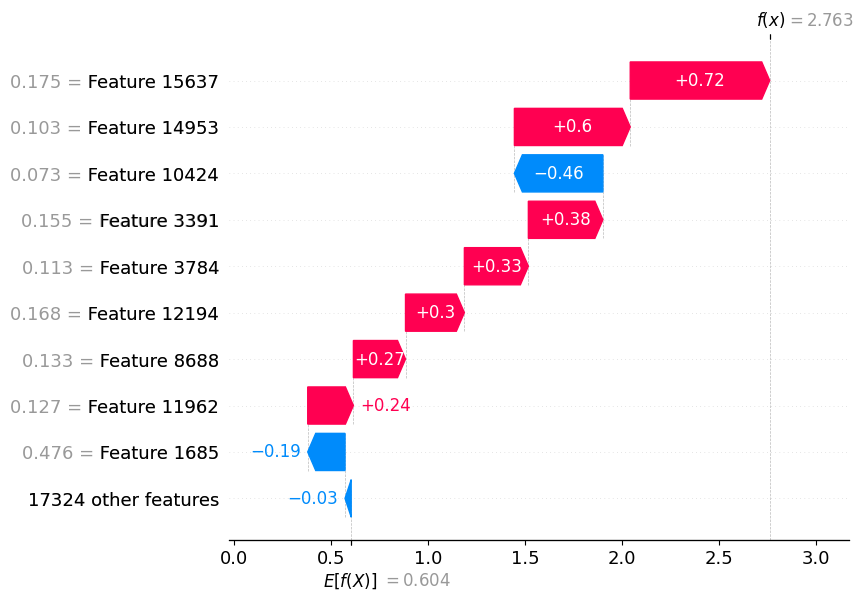

In [237]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

In [238]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot in a straight line how the geatures are contributiong and the relationship between the features. If one value value increases rest will compress. One can see it start at the same base value of 0.5839.

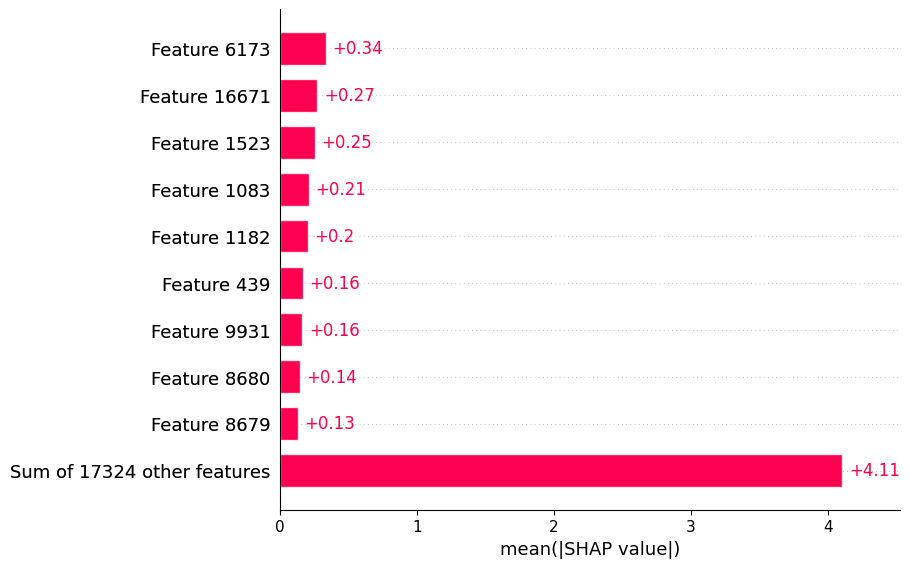

In [239]:
#Mean SHAP
shap.plots.bar(shap_values)

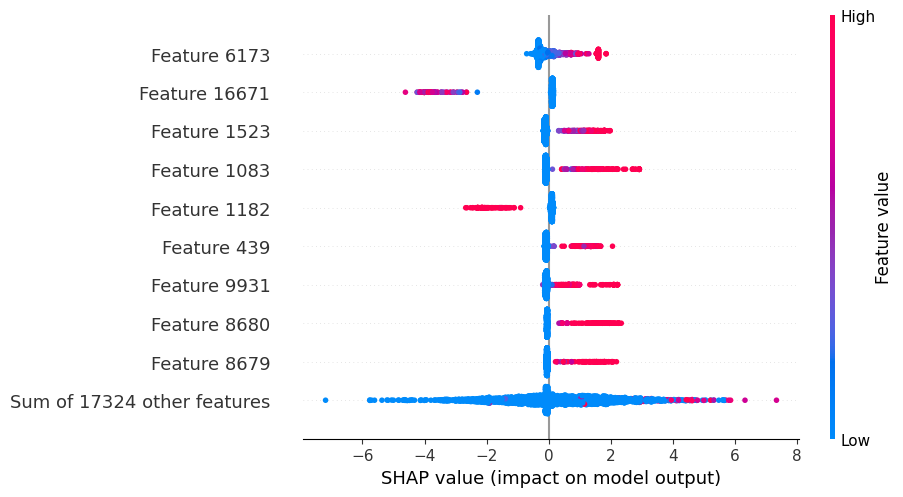

In [240]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

* X_test which was originally the text data, which was converted into numerical feature using different preprocessing steps. Here, with all those shap model we can see some feature are very much important during prediction and these feature have seeinlgy weird name because the feature is likely a specific word or phrase in the text data that the model has learned is important for determining the sentiment.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [241]:
# Save the File
# import joblib

# Save the model to a file
# joblib.dump(model, 'model.joblib')

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [242]:
# Load the File and predict unseen data.
# Load the File and predict unseen data.
# Load the model from the file
# model = joblib.load('model.joblib')

# Use the model to make predictions
# predictions = model.predict(data)

In [243]:
#@title Flask code
# from flask import Flask, request, jsonify
# import pickle

# app = Flask(__name__)

# # Load the pre-trained model
# model = pickle.load(open('sentiment_model.pkl', 'rb'))

# @app.route('/predict', methods=['POST'])
# def predict():
#     # Get the text from the request
#     text = request.json['text']

#     # Use the model to predict the sentiment
#     prediction = model.predict([text])[0]

#     # Return the prediction as a JSON response
#     return jsonify({'sentiment': prediction})

# if __name__ == '__main__':
#     app.run(debug=True)


<font color='#E6E6FA'> MODEL is successfully created and ready for deployment on a live server for a real user interaction !!!

# **Conclusion**

Clustering and sentiment analysis were performed on a dataset of customer reviews for the food delivery service Zomato. The purpose of this analysis was to understand the customer's experience and gain insights about their feedback.

The clustering technique was applied to group customers based on their review text, and it was found that the customers were grouped into two clusters: positive and negative. This provided a general understanding of customer satisfaction levels, with the positive cluster indicating the highest level of satisfaction and the negative cluster indicating the lowest level of satisfaction.

Sentiment analysis was then applied to classify the review text as positive or negative. This provided a more detailed understanding of customer feedback and helped to identify specific areas where the service could be improved.

Overall, this analysis provided valuable insights into the customer's experience with Zomato, and it could be used to guide future business decisions and improve the service. Additionally, by combining clustering and sentiment analysis techniques, a more comprehensive understanding of customer feedback was achieved. 

Other important discoveries during analysis are - 
* AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

* Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.

* North Indian food followed by chinese are best or indeemand food as sold by most of the restaurants.

* Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

* Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.

* restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating. Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.

Some recommendation based on the analysis ▶
* Based on negative reviews like some focused on issues with delivery time or food quality, the company should prioritize addressing these issues to imporve customer satisfaction.

* Based on the clustering, or user interaction customer should be given recommendations.

* Also use the clustering results to target specific customer segments and tailor marketing and promotional efforts accordingly.

**Here we successfully complete our Machine Learning Capstone Project !!!**